# CREDIT RISK ANALYSIS PROJECT

This is a term project for ``Machine Learning 1`` course under studies of ``Data Science and Business Analytics`` Master's degree program in University of Warsaw, Faculty of Economics Sciences. This project is focused on the ``Classification`` methods for the prediction and a reasonably small dataset was used.

Here is the team members:\
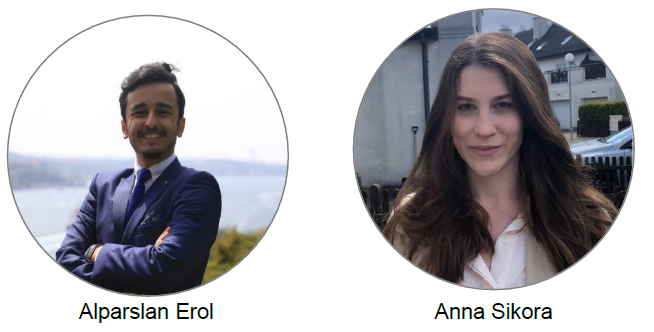

Please find the detailed information of data and problem analysis below.

## Summary of Data

Financial institutions used credit risk analysis models to determine the probability of default of a potential borrower. The models provide information on the level of a borrower’s credit risk at any time. If the lender fails to detect the credit risk in advance, it exposes them to the risk of default and loss of funds. Lenders rely on the validation provided by credit risk analysis models to make key lending decisions on whether to extend credit to the borrower and the credit to be charged.

Credit default risk occurs when the borrower is unable to pay the loan obligation in full or when the borrower is already 90 days past the due date of the loan repayment. The credit default risk may affect all credit-sensitive financial transactions such as loans, bonds, securities, and derivatives.

The level of default risk can change due to a broader economic change. It can also be due because of a change in a borrower’s economic situation, such as increased competition or recession, which can affect the company’s ability to set aside principal and interest payments on the loan.

The data is related with credit risk analysis. Credit default risk is the risk that a lender takes the chance that a borrower fails to make required payments of the loan. The classification goal is to predict the loan defaults (variable **loan_status**) on 32,576 loans and 12 benchmarks.

Defaulting on a loan happens when repayments are not made for a certain period. When a loan defaults, it is sent to a debt collection agency whose job is to contact the borrower and receive the unpaid funds. Defaulting will drastically reduce your credit score, impact your ability to receive future credit, and can lead to the seizure of personal property. If you cannot make payments on time, it is important to contact your lender or loan servicer to discuss restructuring your loan terms.

In this project, it is going to be predict if lender have loan default or not in the payment with binary classification models. 21% of data have positive (1 – have default) output class and 79% of data have negative (0 – do not have default) class. Because of output data is imbalanced, this project can be called as an anomaly detection project and be a tool used to determine the probability of default of a potential borrower.

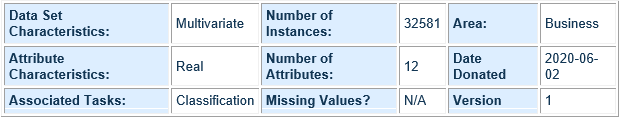

## Source of Data

https://www.kaggle.com/laotse/credit-risk-dataset

## Attribute Analysis

### Input Variables

1.	**person_age(dbl):** is the age of the person at the time of the loan.
2.	**person_income(dbl):** is the yearly income of the person at the time of the loan.
3.	**person_home_ownership(fct):** is the type of ownership of the home.
4.	**person_emp_length(dbl):** is the amount of time in years that person is employed.
5.	**loan_intent(fct):** is the aim of the loan.
6.	**loan_grade(fct):** is a classification system that involves assigning a quality score to a loan based on a borrower's credit history, quality of the collateral, and the likelihood of repayment of the principal and interest.
7.	**loan_amnt(dbl):** is the dimension of the loan taken.
8.	**loan_int_rate(dbl):** is the interest paid for the loan.
9.	**loan_percent_income(dbl):** is the ratio between the loan taken and the annual income.
10.	**cb_person_default_on_file(fct):** answers whether the person has defaulted before.
11.	**cb_person_cred_hist_length(dbl):** represents the number of years of personal history since the first loan taken from that person.

### Output Variables

12.	**loan_status(fct):** is a dummy variable where 1 is default, 0 is not default.


## Reference

- https://corporatefinanceinstitute.com/resources/knowledge/credit/credit-risk-analysis-models/

## Load Libraries, Useful Methods and Classes

To not keep the notebook messy; classes, functions and libraries imported from external .py file written by us.

In [1]:
%run py_files/pipeline.py
%run py_files/utils.py
%run py_files/imports.py

In [2]:
%matplotlib inline

In [3]:
# uncomment this if you want to use interactive plots in notebook
# %matplotlib widget

## PART 0: Initial Look and Analysis of Data
## Read Data

In [4]:
df = pd.read_csv("data/credit_risk_dataset.csv")

In [5]:
df.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [6]:
df.tail()

person_age  person_income person_home_ownership  person_emp_length  \
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30

Let's check the data shape and data types.

In [7]:
print(df.shape)

(32581, 12)


In [8]:
print(df.dtypes)

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object


### Pandas Profiling

In [9]:
# construct pandas profile reporting
dfPr = df.reset_index(drop=True)
profile = ProfileReport(df, title="Profiling Report of DataFrame", html={"style": {"full_width":True}})

In [10]:
# Save .html file for later usage.
profile.to_file("Credit_Risk_Data_Pandas_Profile.html")

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Let's check the data shape.

In [11]:
# Load pandas profiling report from existing .html file in project root.
IFrame(src='./Credit_Risk_Data_Pandas_Profile.html', width=1250, height=600)

### Describe the data.

In [12]:
df.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

### Interpret

From pandas profiling and the analysis above, you can find very good information about the data that we have.

> **person_age** has the max value of 144 which looks like it has some outlier based on the article [HERE](https://www.scientificamerican.com/article/humans-could-live-up-to-150-years-new-research-suggests/#:~:text=And%20even%20if%20we%20make,between%20120%20and%20150%20years.).\
  **person_emp_length** has the max value of 123 which looks like it has some outlier.

**From the analysis above, it can be observed that there are outliers in the data.**
- 


**Warnings**

- Dataset has 165 (**0.5%**) duplicate rows -> Duplicates
- **``person_emp_length``** has 895 (**2.7%**) missing values -> Missing
- **``loan_int_rate``** has 3116 (**9.6%**) missing values -> Missing
- **``person_income``** is highly skewed (γ1 = 32.86534883) -> Skewed
- **``person_emp_length``** has 4105 (**12.6%**) zeros -> Zeros
- **``person_age``** and **``cb_person_cred_hist_length``** are highly correlated in each other.

# PART 1: Data Preprocessing

#### Categorical Value Analysis

In [13]:
categoric_columns = list()
for column in df.columns:
    if len(df[column].unique()) < 10:
        print(column)
        print(df[column].unique())
        if column in df.columns[df.dtypes == "object"]:
            print("This column is an object type!\n")
            categoric_columns.append(column)
        if column == "loan_status":
            print("This column is the output column!\n")

person_home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
This column is an object type!

loan_intent
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
This column is an object type!

loan_grade
['D' 'B' 'C' 'A' 'E' 'F' 'G']
This column is an object type!

loan_status
[1 0]
This column is the output column!

cb_person_default_on_file
['Y' 'N']
This column is an object type!



**Output Variable**

- **``loan_status``**

**Binary Variables**

- **``cb_person_default_on_file``**

**Nominal Variables**

- **``loan_intent``**

- **``person_home_ownership``**


**Ordinal Variables**

- **``loan_grade``** seems as a ordinal variable.

In [14]:
df.columns[df.dtypes == "object"]

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [15]:
categoric_columns == df.columns[df.dtypes == "object"]

array([ True,  True,  True,  True])

In [16]:
print(categoric_columns)

['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


### Missing Value Treatment
Lets' check columns wiht NA values.

In [17]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Percentages of NA values.

In [18]:
nan_columns = dict()
temp = df.isna().sum()
for index, column in enumerate(df.columns):
    if temp[index] != 0:
        nan_columns[column] = (temp[index], f"{round((temp[index]/df.shape[0])*100, 2)}%") 
print(nan_columns)

{'person_emp_length': (895, '2.75%'), 'loan_int_rate': (3116, '9.56%')}


In [19]:
# fill NaN values with mode and median
df['person_emp_length'].fillna(df['person_emp_length'].mode()[0], inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)

In [20]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

Let's check the correlation between the features.

### Correlation Analaysis

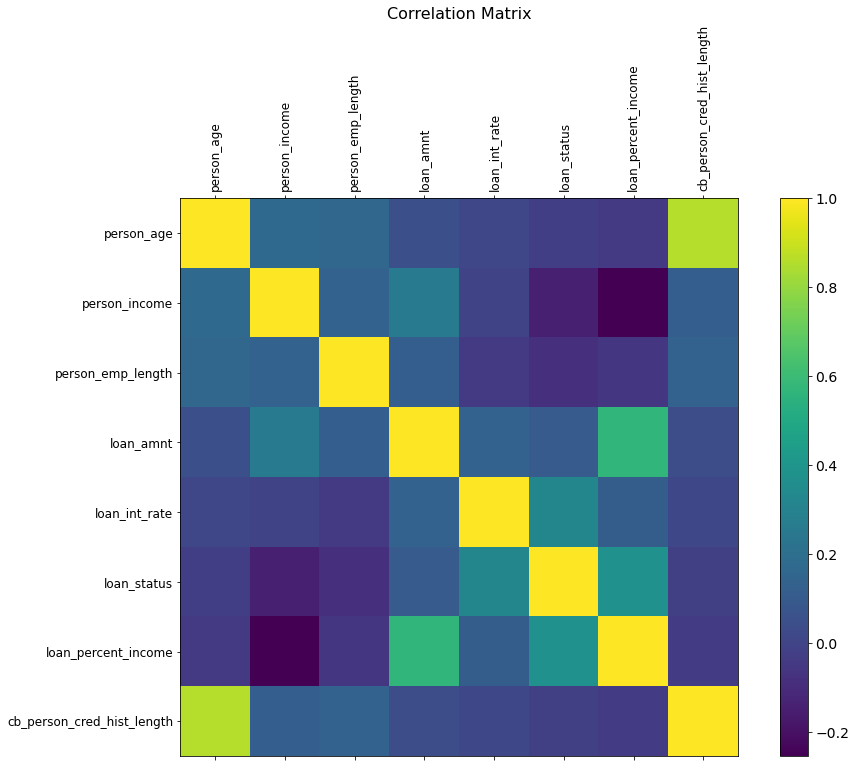

In [21]:
make_corr_plot(df, categoric_columns)

In [22]:
# Create correlation matrix
corr_matrix = df[df.columns[2:]].drop(categoric_columns, axis=1).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

Let's find correlated columns higher than 90%

In [23]:
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] >= 0.9)]
print(to_drop)

[]


In [24]:
print(corelation_output(to_drop, upper))

None


There are no highly correlated features.

# PART 2: Visualization

#### Scatter Plot Employment Length vs Age

Text(0.5, 1.0, 'Employment Length vs Age')

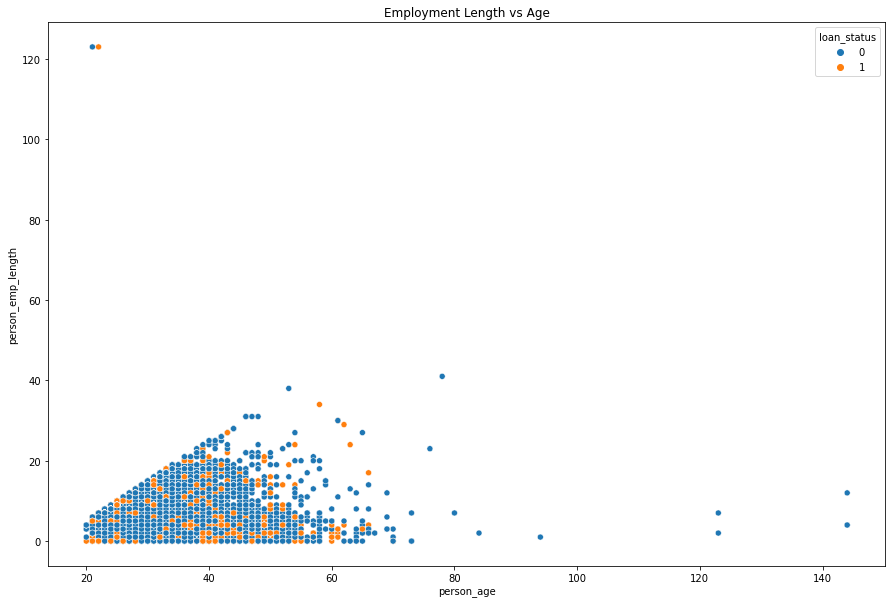

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.scatterplot(data=df, x="person_age", y="person_emp_length", hue="loan_status")
plt.title("Employment Length vs Age")

It is impossible that some ``20 years old people`` have around ``120 years employment length``.
> We may clean data by removing:
> - ``person_age`` > 100,
> - ``person_emp_length`` > 100

In [26]:
df = df[df['person_age'] <= 100]
df = df[df['person_emp_length'] <= 100]

#### Scatter Plot Income vs Age

Text(0.5, 1.0, 'Income vs Age')

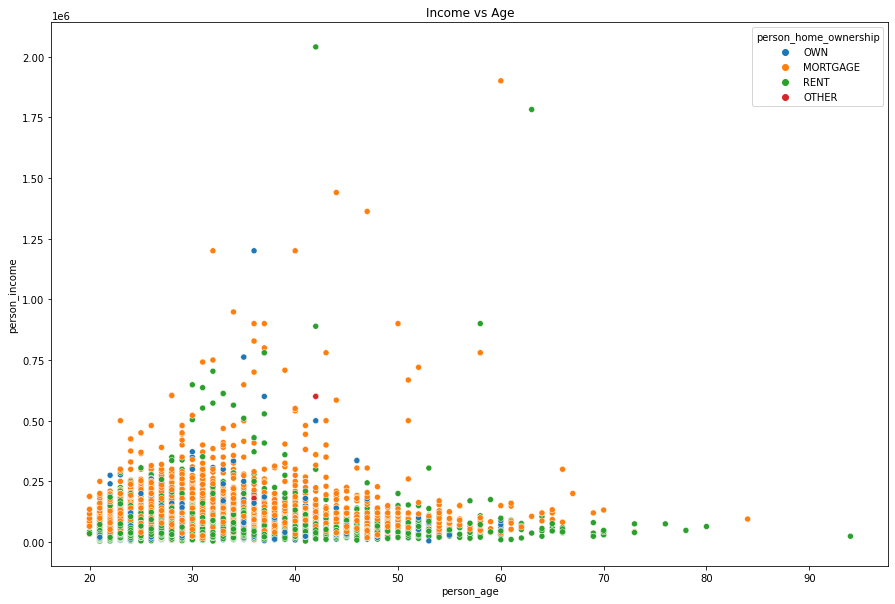

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.scatterplot(data=df, x="person_age", y="person_income", hue="person_home_ownership")
plt.title("Income vs Age")

#### Scatter Plot loan_amnt vs loan_int_rate

Text(0.5, 1.0, 'loan_amnt vs loan_int_rate')

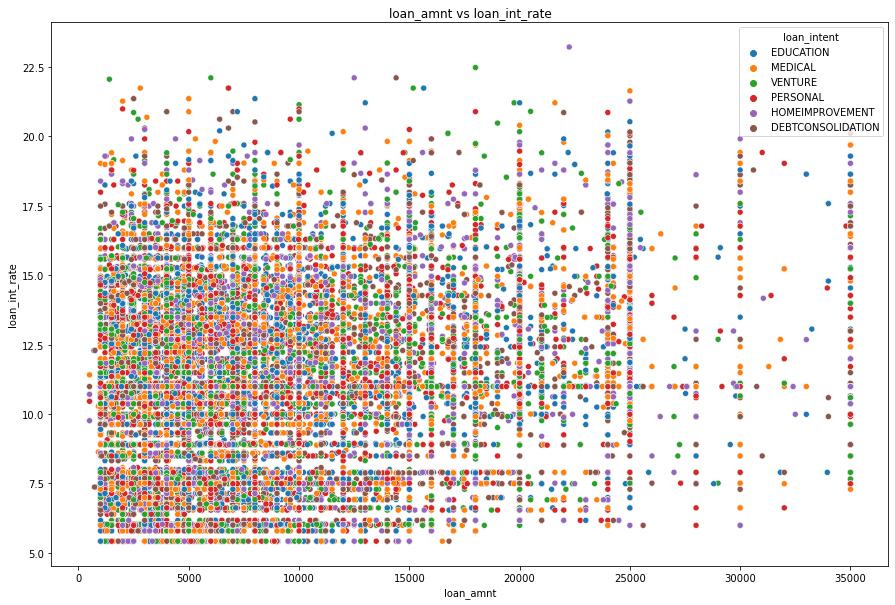

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.scatterplot(data=df, x="loan_amnt", y="loan_int_rate", hue="loan_intent")
plt.title("loan_amnt vs loan_int_rate")

``loan_intent`` has a good distribution.

#### Scatter Plot loan_amnt vs person_income

Text(0.5, 1.0, 'loan_amnt vs person_income')

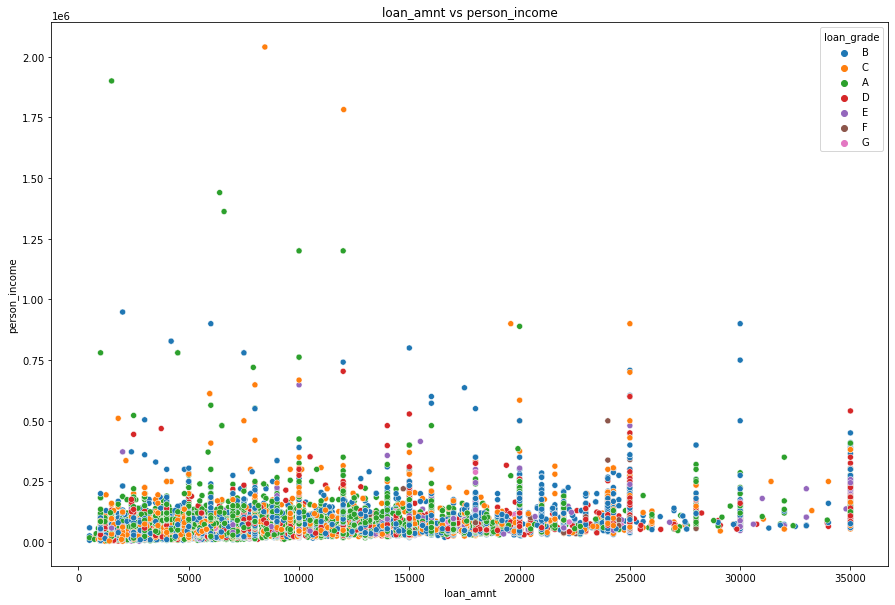

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.scatterplot(data=df, x="loan_amnt", y="person_income", hue="loan_grade")
plt.title("loan_amnt vs person_income")

``loan_intent`` has a good distribution.

#### Scatter Plot person_age vs person_emp_length

Text(0.5, 1.0, 'person_age vs person_emp_length')

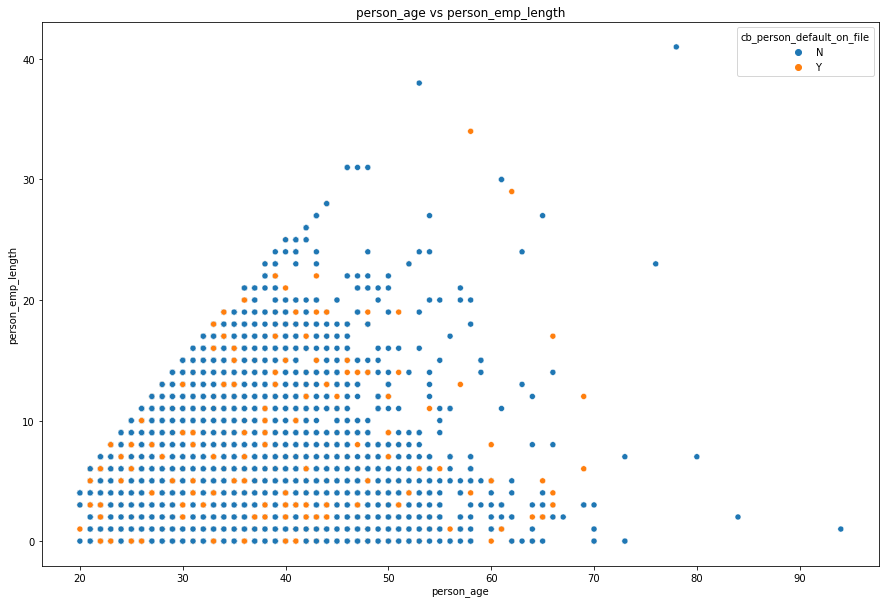

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.scatterplot(data=df, x="person_age", y="person_emp_length", hue="cb_person_default_on_file")
plt.title("person_age vs person_emp_length")

Values are meaningful for me!

#### Scatter Plot person_age vs loan_int_rate

Text(0.5, 1.0, 'person_age vs loan_int_rate')

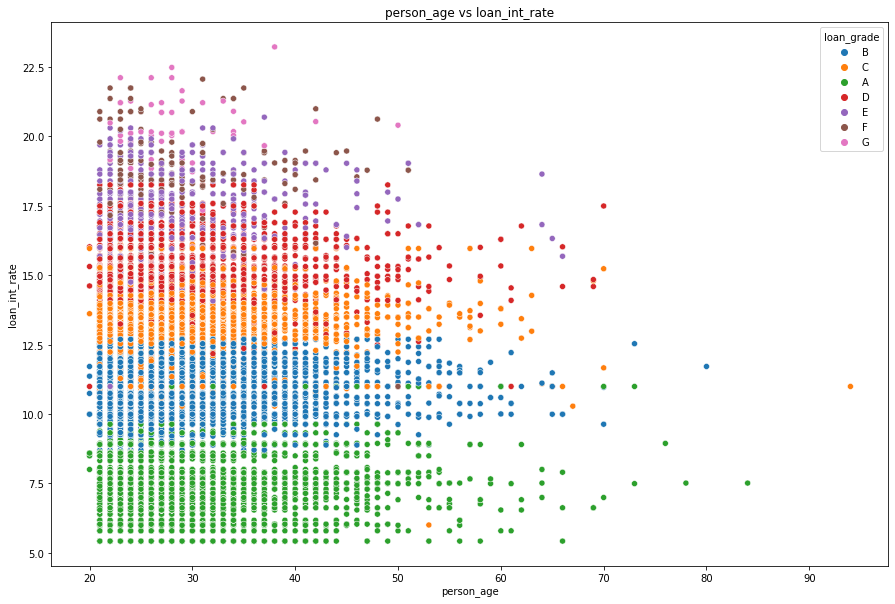

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.scatterplot(data=df, x="person_age", y="loan_int_rate", hue="loan_grade")
plt.title("person_age vs loan_int_rate")

- It can be easily concluded that, ``loan_int_rate`` is highly dependent on ``loan_grade`` value.
- Older people has lower interest rates with respoect to the young people.

- There are thresholds on ``loan_int_rate ~= 14`` and ``loan_percent_income ~=0.3`` which seperate output values.
    - We can say that, under these thresholds, given credit is less risky.

## Output Column Analysis

Let's check output column distribution.

In [32]:
print(df.loan_status.value_counts())

0    25467
1     7107
Name: loan_status, dtype: int64


In [33]:
df.loan_status.unique()

array([0, 1], dtype=int64)

#### PIE Chart to Show Distribution of Output Class Values

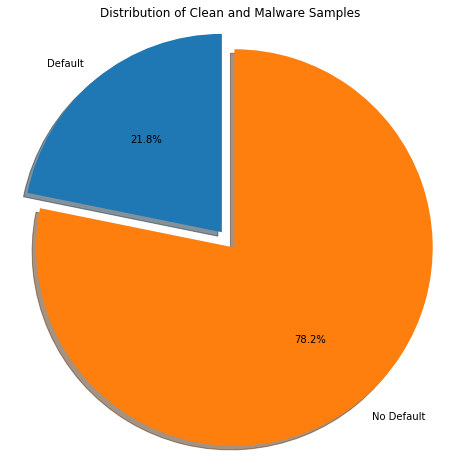

In [34]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Default', 'No Default'
sizes = [100 * len(df[df['loan_status'] == 1]) / len(df), 100 * len(df[df['loan_status'] == 0]) / len(df)]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Clean and Malware Samples')
plt.show()

It seems that, output column has a small imbalance distribution issue.

Let's check the duplicates.

In [35]:
print('The number of duplicates is {}\n'.format(df.duplicated().sum()))
print('The total numer of rows is {}\n'.format(df.shape[0]))
print(f"Ratio is {round((df.duplicated().sum()/df.shape[0])*100, 2)}%")

The number of duplicates is 165

The total numer of rows is 32574

Ratio is 0.51%


In [36]:
pd.crosstab(df['cb_person_default_on_file'], df['loan_status'])

loan_status                    0     1
cb_person_default_on_file             
N                          21894  4936
Y                           3573  2171

#### Scatter Plot loan_percent_income vs loan_int_rate

Text(0.5, 1.0, 'loan_percent_income vs loan_int_rate')

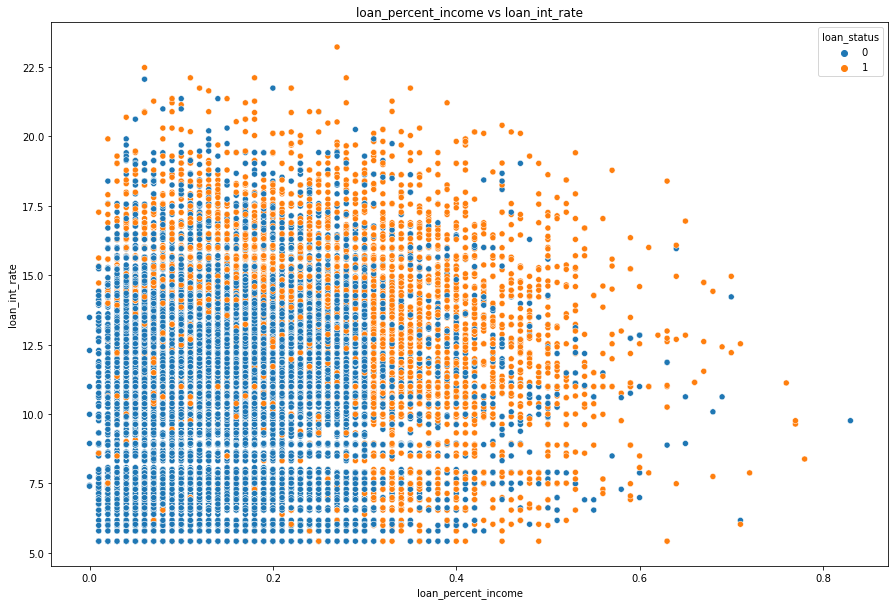

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.scatterplot(data=df, x="loan_percent_income", y="loan_int_rate", hue="loan_status")
plt.title("loan_percent_income vs loan_int_rate")

#### Correlation Plot with Output Column

We can observe positively and negatively correlated features to the output columns

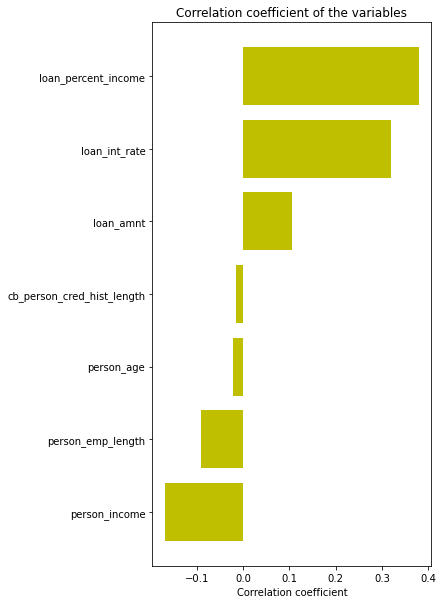

In [38]:
# YOU CAN OBSERVE POSITIVE AND NEGATIVE CORRELATION BETWEEN INOUT COLUMNS AND OUTPUT COLUMN WITH SORTING
# Now let us look at the correlation coefficient of each of these variables
x_cols = pd.DataFrame(df[df.select_dtypes(include=['float64', 'int64']).columns]).columns['loan_status' != (df[df.select_dtypes(include=['float64', 'int64']).columns]).columns]

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(df[col].values, df["loan_status"].values)[0,1])
corr_dfio = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_dfio = corr_dfio.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(5,10))
rects = ax.barh(ind, np.array(corr_dfio.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_dfio.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()

## Part 3: Feature Engineering & Feature Importance

**Output Variable**

- **``loan_status``**

**Binary Variables**

- **``cb_person_default_on_file``**

**Nominal Variables**

- **``loan_intent``**

- **``person_home_ownership``**


**Ordinal Variables**

- **``loan_grade``** seems as a ordinal variable.

In [39]:
categoric_columns

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [40]:
binary_columns = ['cb_person_default_on_file']
ordinal_columns = ['loan_grade']
nominal_columns = ['loan_intent',
                   'person_home_ownership']

## Split data to input and output

In [41]:
X = df.copy()
X = X.drop(['loan_status'], axis=1)
X.head()

person_age  person_income person_home_ownership  person_emp_length  \
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   
5          21           9900                   OWN                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
1   EDUCATION          B       1000          11.14                 0.10   
2     MEDICAL          C       5500          12.87                 0.57   
3     MEDICAL          C      35000          15.23                 0.53   
4     MEDICAL          C      35000          14.27                 0.55   
5     VENTURE          A       2500           7.14                 0.25   

  cb_person_default_on_file  cb_person_cred_hist_length  
1                         N                           2  
2                         N                           3  
3                         N                           2  
4                         Y                           4  
5                         N                           2

In [42]:
numeric_columns = X.select_dtypes(exclude = 'object').columns

In [43]:
y = df['loan_status'].copy()
y.head()

1    0
2    1
3    1
4    1
5    1
Name: loan_status, dtype: int64

### One Hot Encoding

In [44]:
oneHotdf = pd.get_dummies(X[nominal_columns])
X = pd.concat([X, oneHotdf], axis=1)
X = X.drop(nominal_columns, axis=1)
X.head()

person_age  person_income  person_emp_length loan_grade  loan_amnt  \
1          21           9600                5.0          B       1000   
2          25           9600                1.0          C       5500   
3          23          65500                4.0          C      35000   
4          24          54400                8.0          C      35000   
5          21           9900                2.0          A       2500   

   loan_int_rate  loan_percent_income cb_person_default_on_file  \
1          11.14                 0.10                         N   
2          12.87                 0.57                         N   
3          15.23                 0.53                         N   
4          14.27                 0.55                         Y   
5           7.14                 0.25                         N   

   cb_person_cred_hist_length  loan_intent_DEBTCONSOLIDATION  \
1                           2                              0   
2                           3                              0   
3                           2                              0   
4                           4                              0   
5                           2                              0   

   loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  \
1                      1                            0                    0   
2                      0                            0                    1   
3                      0                            0                    1   
4                      0                            0                    1   
5                      0                            0                    0   

   loan_intent_PERSONAL  loan_intent_VENTURE  person_home_ownership_MORTGAGE  \
1                     0                    0                               0   
2                     0                    0                               1   
3                     0                    0                               0   
4                     0                    0                               0   
5                     0                    1                               0   

   person_home_ownership_OTHER  person_home_ownership_OWN  \
1                            0                          1   
2                            0                          0   
3                            0                          0   
4                            0                          0   
5                            0                          1   

   person_home_ownership_RENT  
1                           0  
2                           0  
3                           1  
4                           1  
5                           0

### Custom Map Encoding

In [45]:
loan_grade_map = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
}

cb_person_default_on_file_map = {
    'N': 0,
    'Y': 1,
}

In [46]:
X['loan_grade'] = X.loan_grade.map(loan_grade_map)
X.head()

person_age  person_income  person_emp_length  loan_grade  loan_amnt  \
1          21           9600                5.0           2       1000   
2          25           9600                1.0           3       5500   
3          23          65500                4.0           3      35000   
4          24          54400                8.0           3      35000   
5          21           9900                2.0           1       2500   

   loan_int_rate  loan_percent_income cb_person_default_on_file  \
1          11.14                 0.10                         N   
2          12.87                 0.57                         N   
3          15.23                 0.53                         N   
4          14.27                 0.55                         Y   
5           7.14                 0.25                         N   

   cb_person_cred_hist_length  loan_intent_DEBTCONSOLIDATION  \
1                           2                              0   
2                           3                              0   
3                           2                              0   
4                           4                              0   
5                           2                              0   

   loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  \
1                      1                            0                    0   
2                      0                            0                    1   
3                      0                            0                    1   
4                      0                            0                    1   
5                      0                            0                    0   

   loan_intent_PERSONAL  loan_intent_VENTURE  person_home_ownership_MORTGAGE  \
1                     0                    0                               0   
2                     0                    0                               1   
3                     0                    0                               0   
4                     0                    0                               0   
5                     0                    1                               0   

   person_home_ownership_OTHER  person_home_ownership_OWN  \
1                            0                          1   
2                            0                          0   
3                            0                          0   
4                            0                          0   
5                            0                          1   

   person_home_ownership_RENT  
1                           0  
2                           0  
3                           1  
4                           1  
5                           0

In [47]:
X['cb_person_default_on_file'] = X.cb_person_default_on_file.map(cb_person_default_on_file_map)
X.head()

person_age  person_income  person_emp_length  loan_grade  loan_amnt  \
1          21           9600                5.0           2       1000   
2          25           9600                1.0           3       5500   
3          23          65500                4.0           3      35000   
4          24          54400                8.0           3      35000   
5          21           9900                2.0           1       2500   

   loan_int_rate  loan_percent_income  cb_person_default_on_file  \
1          11.14                 0.10                          0   
2          12.87                 0.57                          0   
3          15.23                 0.53                          0   
4          14.27                 0.55                          1   
5           7.14                 0.25                          0   

   cb_person_cred_hist_length  loan_intent_DEBTCONSOLIDATION  \
1                           2                              0   
2                           3                              0   
3                           2                              0   
4                           4                              0   
5                           2                              0   

   loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  \
1                      1                            0                    0   
2                      0                            0                    1   
3                      0                            0                    1   
4                      0                            0                    1   
5                      0                            0                    0   

   loan_intent_PERSONAL  loan_intent_VENTURE  person_home_ownership_MORTGAGE  \
1                     0                    0                               0   
2                     0                    0                               1   
3                     0                    0                               0   
4                     0                    0                               0   
5                     0                    1                               0   

   person_home_ownership_OTHER  person_home_ownership_OWN  \
1                            0                          1   
2                            0                          0   
3                            0                          0   
4                            0                          0   
5                            0                          1   

   person_home_ownership_RENT  
1                           0  
2                           0  
3                           1  
4                           1  
5                           0

### Split Data into Train and Test

In [48]:
# Split dataset as 80% train data and 20% test data.
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Check shape of splitted data.
X_train_0.shape, X_test_0.shape, y_train_0.shape, y_test_0.shape

((26059, 19), (6515, 19), (26059,), (6515,))

#### Initial Random Forest Classifier to Show Important Features

In [50]:
rf=RandomForestClassifier()
rf.fit(X_train_0,y_train_0)

RandomForestClassifier()

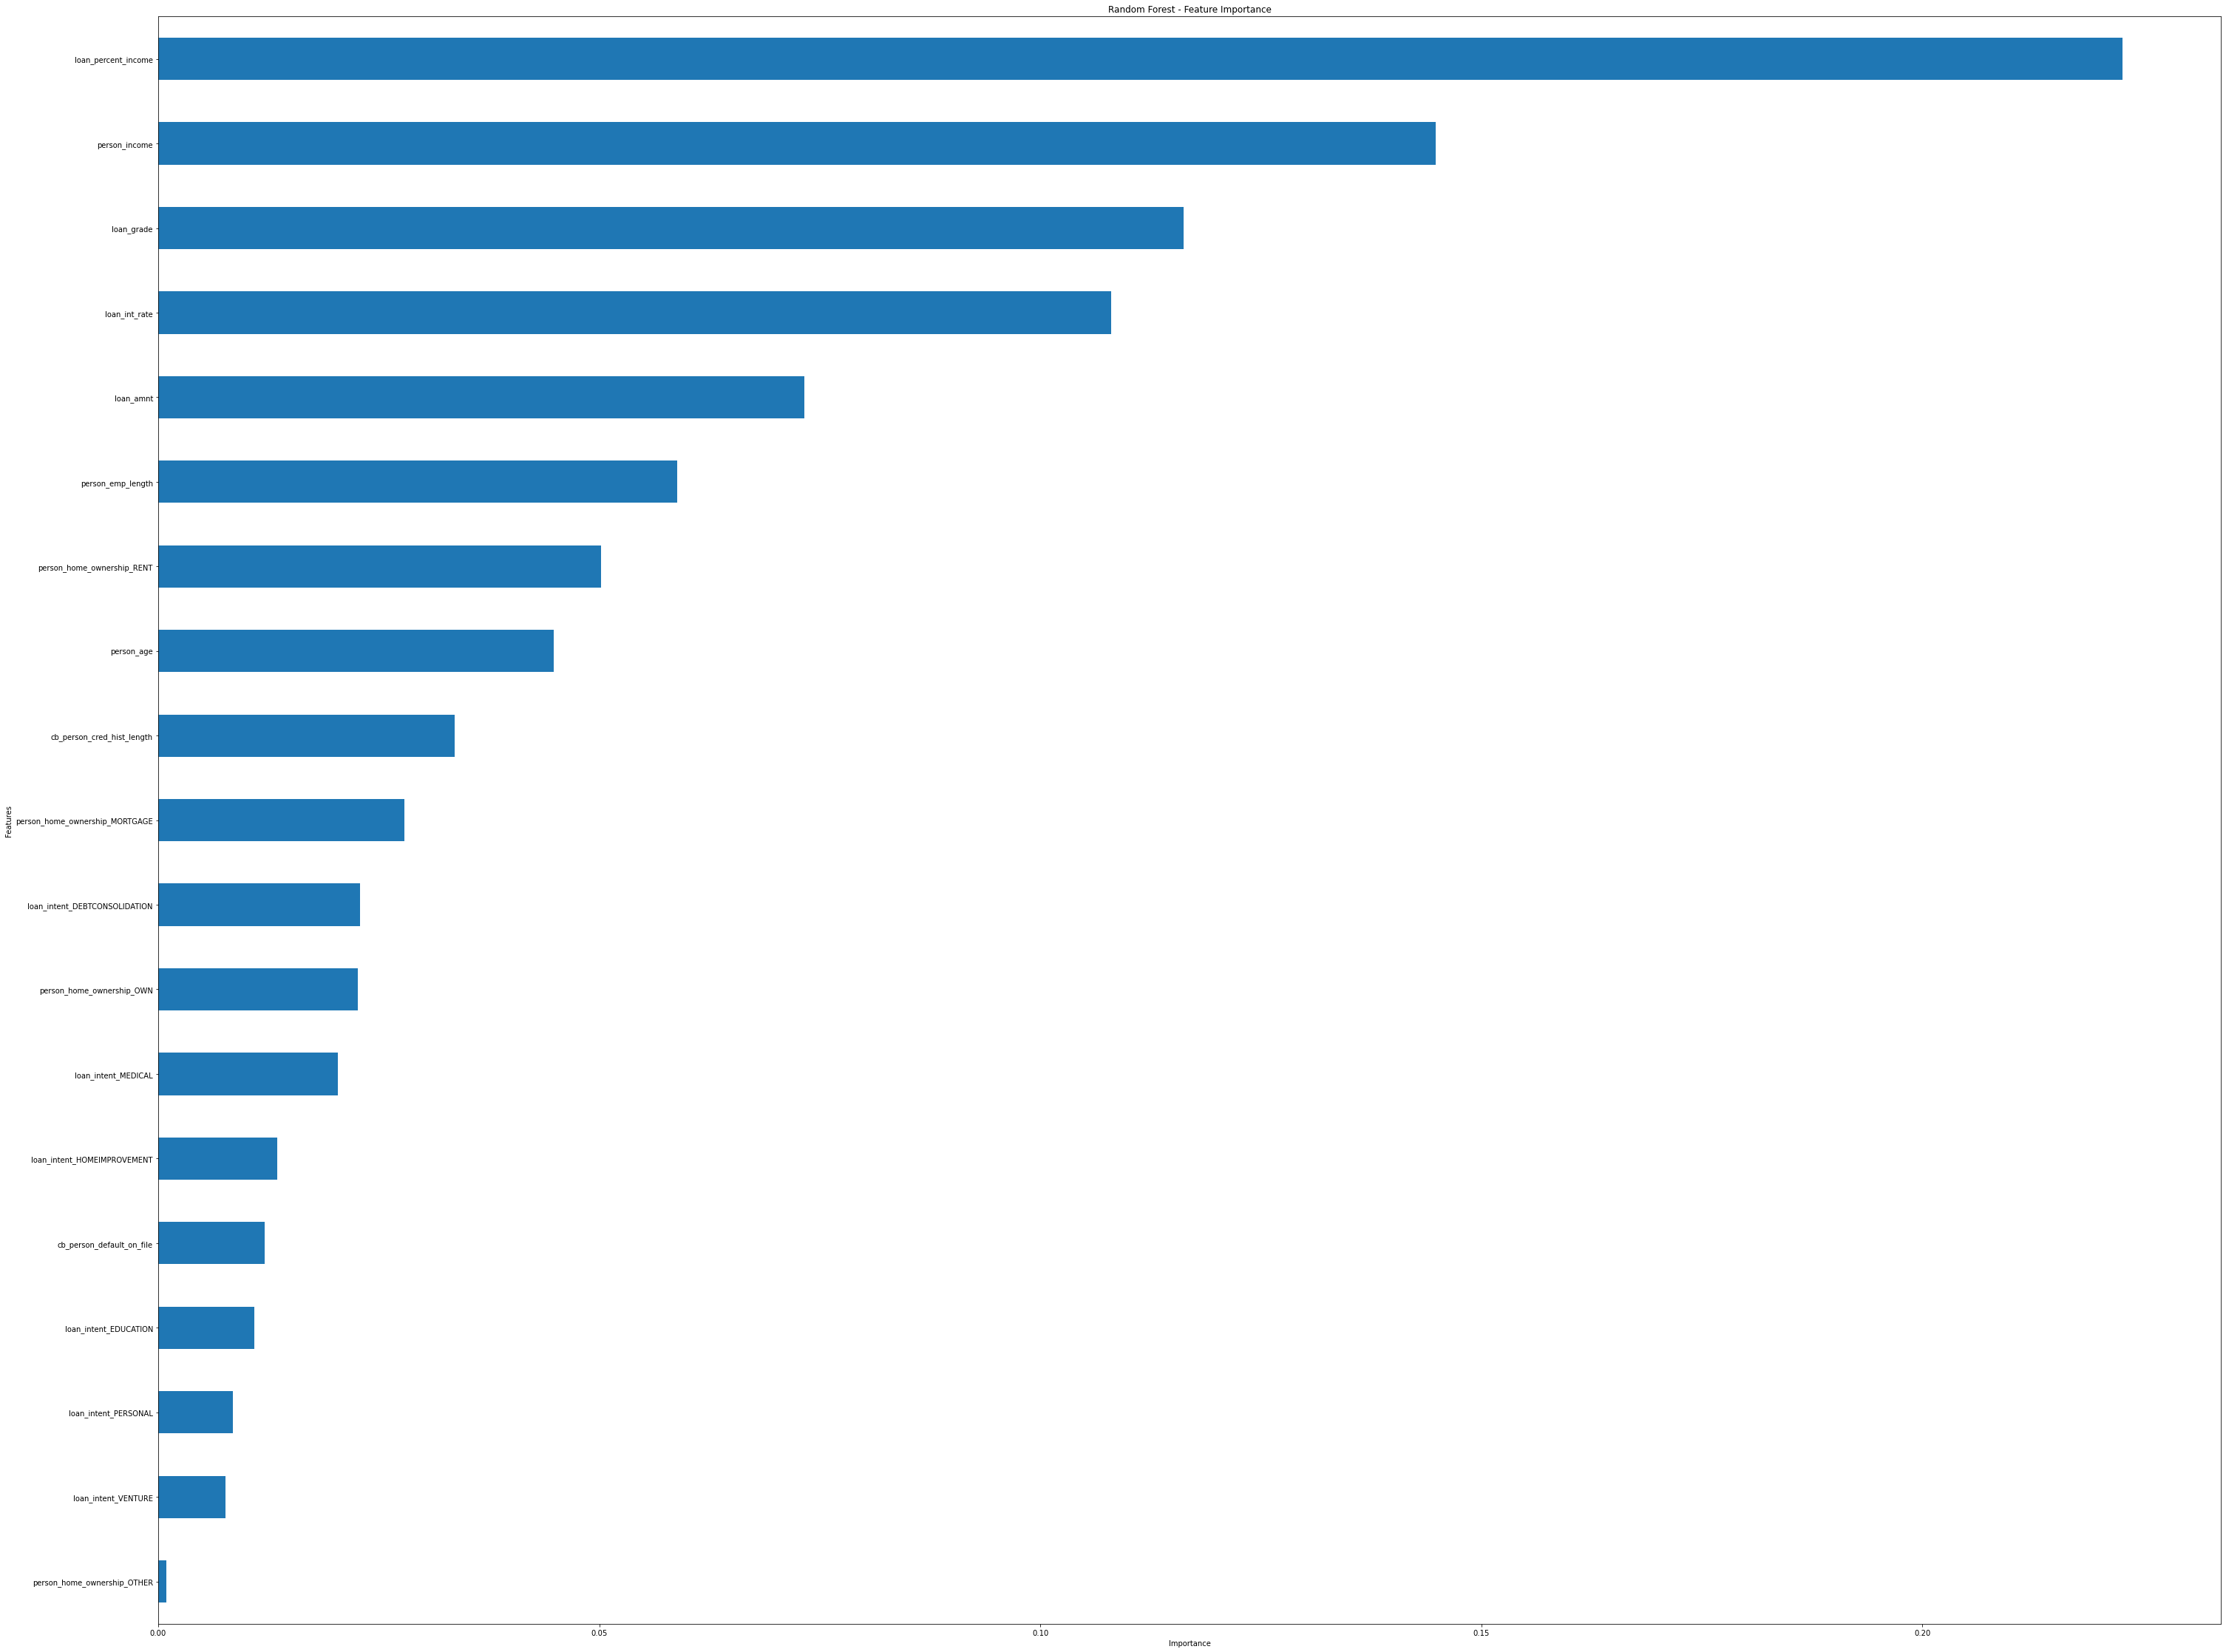

In [51]:
fea_imp = pd.DataFrame({'imp': rf.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(50, 40), legend=None)
plt.title('Random Forest - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance');

In [52]:
fea_imp.sort_values(by=['imp'], ascending=False)

imp                             col
6   0.222692             loan_percent_income
1   0.144788                   person_income
3   0.116246                      loan_grade
5   0.108047                   loan_int_rate
4   0.073282                       loan_amnt
2   0.058860               person_emp_length
18  0.050208      person_home_ownership_RENT
0   0.044842                      person_age
8   0.033591      cb_person_cred_hist_length
15  0.027932  person_home_ownership_MORTGAGE
9   0.022923   loan_intent_DEBTCONSOLIDATION
17  0.022593       person_home_ownership_OWN
12  0.020386             loan_intent_MEDICAL
11  0.013497     loan_intent_HOMEIMPROVEMENT
7   0.012076       cb_person_default_on_file
10  0.010928           loan_intent_EDUCATION
13  0.008496            loan_intent_PERSONAL
14  0.007663             loan_intent_VENTURE
16  0.000952     person_home_ownership_OTHER

We may remove last 3 feature in the list based on the importance score.
> We could use PCA for dimentionality reduction, but we prefer feature importance

In [53]:
fea_imp.sort_values(by=['imp'], ascending=False).tail(3).col.values

array(['loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'person_home_ownership_OTHER'], dtype=object)

# PART 4: WORK ON MODELS AND FIND THE BEST ONE


**1. Logistic Regression with Class Weights**

**2. Logistic Regression without Class Weights**

**3. Logistic Regression with Upsampled Data**

**4. Logistic Regression with Downsampled Data**

**5. Linear Regression with Regularization - Ridge Regression**

**6. XGBoost Classifier**

**7. Random Forest Classifier**

**8. LGBM Classifier**

### Prepare Data For Train and Test

In [54]:
X = df.copy()
X = X.drop(['loan_status'], axis=1)
X.head()

person_age  person_income person_home_ownership  person_emp_length  \
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   
5          21           9900                   OWN                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
1   EDUCATION          B       1000          11.14                 0.10   
2     MEDICAL          C       5500          12.87                 0.57   
3     MEDICAL          C      35000          15.23                 0.53   
4     MEDICAL          C      35000          14.27                 0.55   
5     VENTURE          A       2500           7.14                 0.25   

  cb_person_default_on_file  cb_person_cred_hist_length  
1                         N                           2  
2                         N                           3  
3                         N                           2  
4                         Y                           4  
5                         N                           2

In [55]:
numeric_columns = X.select_dtypes(exclude = 'object').columns

In [56]:
y = df['loan_status'].copy()
y.head()

1    0
2    1
3    1
4    1
5    1
Name: loan_status, dtype: int64

In [57]:
outlier_index = IQR_Outliers(X, numeric_columns)

# of features:  7
Features:  Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')
Number of samples:  32574

Feature:  person_age
Upper and Lower limits:  100.0 -47.0
Number of outliers:  0
Outliers Index:  []
Outliers:  []

Feature:  person_income
Upper and Lower limits:  486200.0 -368500.0
Number of outliers:  58
Outliers Index:  [15, 17833, 17834, 17840, 17846, 17847, 17848, 18635, 18917, 21462, 21958, 23429, 23431, 25714, 27798, 27877, 27881, 27882, 27883, 27884, 28253, 28633, 28770, 29119, 29120, 29121, 29122, 29126, 29127, 29128, 29129, 29131, 29345, 29514, 30049, 30536, 31911, 31912, 31913, 31914, 31915, 31916, 31918, 31919, 31921, 31922, 31924, 32037, 32070, 32291, 32298, 32300, 32303, 32497, 32543, 32544, 32546, 32551]
Outliers:  [ 500000 1200000  948000  648000  504000  500000  500000  636000  510000
  612000  564000  552000  648000  703800  572400  522000  6

Please find IQR_Outliers in utils.py

In [58]:
indices = [x for x in X.index]
outlier_index = list(set(outlier_index))
clean_data = np.setdiff1d(indices,outlier_index)

### Remove Outlier Data

In [59]:
X = X.loc[clean_data]

In [60]:
y = y.loc[clean_data]

### Prefixes to add aggregated feature in the training set.

In [61]:
groups_prefixes = [
    "person",
    "loan",
    "cb_person",
]

#### Specify binary, ordinal and nominal variables
Please find maps for custom encoding.

In [62]:
binary_columns = ['cb_person_default_on_file']
ordinal_columns = ['loan_grade']
nominal_columns = ['loan_intent',
                   'person_home_ownership']

loan_grade_map = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
}

cb_person_default_on_file_map = {
    'N': 0,
    'Y': 1,
}

### Specify Train Test Split Values

In [63]:
SEED = 313
SEED_VAL = 3134
VALIDATION_SIZE = 0.20
TEST_SIZE = 0.1

### Split Data Train, Test and Validation.

- ``79%`` for **Train Set**
- ``20%`` for **Validation Set**
- ``1%`` for **Test Set**

In [64]:
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=VALIDATION_SIZE, random_state=SEED, stratify=y)

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=TEST_SIZE, random_state=SEED_VAL)

In [66]:
print(X_train.shape), print(X_test.shape), print(X_val.shape)

(23410, 11)
(2602, 11)
(6504, 11)


(None, None, None)

In [67]:
print(Y_train.shape), print(Y_test.shape), print(Y_val.shape)

(23410,)
(2602,)
(6504,)


(None, None, None)

> Validation data is used with name that have ``_train_1, _test_1`` suffixes for the model selection process! 

Please mind this to not misunderstood, basically data with ``_train_1 and _test_1`` suffixes are exactly same with validation data for the following model selection process [HERE](#Start_Model_Selection), original train, test and validation data will be used in the final result with CV + Grid search optimization in [HERE](#Grid_Search).

Please find the final output for validation data after cv + grid search optimization [HERE](#VALIDATION_DATA).

Test data kept to control the model robustness [HERE](#TEST_DATA) at the end of the grid-search optimization to best selected model! So data with ``_test`` suffix is for testting the model behavior and robustness in production.

In [68]:
X_train_1 = X_train.copy()
X_test_1 = X_val.copy()
y_train_1 = Y_train.copy()
y_test_1 = Y_val.copy()

In [69]:
# X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=TEST_SIZE, random_state=SEED, stratify=y)

In [70]:
X_train_1.shape, X_test_1.shape, y_train_1.shape, y_test_1.shape

((23410, 11), (6504, 11), (23410,), (6504,))

#### Check distribution of output class

In [71]:
unique, counts = np.unique(y_test_1, return_counts=True)
print(dict(zip(unique, counts)))

{0: 5084, 1: 1420}


## Start_Model_Selection

## 1. Logistic Regression with Class Weight

In [72]:
# CLASS_WEIGHT CALCULATION
weight_for_1 = (1 / 7107)*(32574)/2.0 
weight_for_0 = (1 / 25467)*(32574)/2.0

class_weight = {1: weight_for_1, 0: weight_for_0}

print('Value Counts is..:\n', df['loan_status'].value_counts())
print('Weight for class  1: {:.2f}'.format(weight_for_1))
print('Weight for class  0: {:.2f}'.format(weight_for_0))

Value Counts is..:
 0    25467
1     7107
Name: loan_status, dtype: int64
Weight for class  1: 2.29
Weight for class  0: 0.64


### Pipeline to Make Training Process Automatically and Transform Training Data Before Train the Model
Recall that we split train and test data with initial data, the preprocessing steps is for experimental usage.\
Now we are going to use pipeline to automate all process in one place.

What we have in the Pipeline:

**encoder:** Custom_Encoder(binary_columns=binary_columns, ordinal_columns=ordinal_columns, nominal_columns=nominal_columns, loan_grade_map=loan_grade_map, cb_person_default_on_file_map=cb_person_default_on_file_map))\
Encoder step in the pipeline automate all encoding process in one for binary, ordinal, nominal values with one hot encoding and custom map encoder that developed by us.\
Please find Custom_Encoder class that written by us in ``pipeline.py`` file.

**inputer:** SimplePandasInputer(missing_values=np.nan, strategy="median")), # most_frequent, mean, constant\
This class just extend the sklearn SimplePandasInputer and it allow us to use other strategies in grid search solution. Please find grid search solution at the end of this file with best model prediction.\
Please find SimplePandasInputer class that written by us in ``pipeline.py`` file.

**group_columns:** SumByPrefixes(groups_prefixes, drop=False))\
SumByPrefixes class written by us and groups the columns with given prefix values and to create aggregated feature on this prefix values, it takes sum of the grouped columns and write the solution on new feature.\
In this method we grouped the features with <``person_``, ``loan_``, ``cb_person``> prefix values. Thanks to this, we are able to create informative column for the training and we will be able to observe total inpact of group values to the model decision.\
Please find SumByPrefixes class that written by us in ``pipeline.py`` file.

**var_selector:** VarianceThreshold(threshold=0.0)), # not used!\
This step added in the pipeline but after that decided that not to use it. We keep in just in case and give the threshold=0.0 to deactivate it.

**kbest_selector:** SelectKBest(chi2, k='all')), # not used!\
This step added in the pipeline but after that decided that not to use it. We keep in just in case and give the k='all' to deactivate it.

**from_model_selector:** SelectFromModel(estimator=LogisticRegression(), threshold=-np.inf)), # not used\
This step added in the pipeline but after that decided that not to use it. We keep in just in case and give the threshold=-np.inf to deactivate it.

**scaler:** MinMaxScaler())
This comes from sklearn package and added to pipleine to scale numeric valeus before training.

**clf:** ANY CLASSIFIER...
This step represent the classifier algorithm that we are going to use and automate this process.

This pipeline steps work as a principle of ``fit()``, ``transform()`` and you can use it in one command like ``fit_transform()``. If you want to use these steps seperately, you can use this procedure to transform your data before training.

In [73]:
clf_a = Pipeline([
    ('encoder', Custom_Encoder(binary_columns=binary_columns, ordinal_columns=ordinal_columns, nominal_columns=nominal_columns, loan_grade_map=loan_grade_map, cb_person_default_on_file_map=cb_person_default_on_file_map)),    
    ("inputer", SimplePandasInputer(missing_values=np.nan, strategy="median")), # most_frequent, mean, constant
    ('group_columns', SumByPrefixes(groups_prefixes, drop=False)), # can be comment out
    ('var_selector', VarianceThreshold(threshold=0.0)), # not used!
    ('kbest_selector', SelectKBest(chi2, k='all')), # not used!
    ("from_model_selector", SelectFromModel(estimator=LogisticRegression(), threshold=-np.inf)), # not used
    ('scaler', MinMaxScaler()), # try with not used!
    (
        "clf",
        LogisticRegression(
            class_weight=class_weight
        ),
    ),
])


Evaluation results for fold 1 ..: 
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels

[[4092  992]
 [ 306 1114]]


accuracy: 0.800430504305043
precision: 0.5289648622981956
recall: 0.7845070422535211
f1 score: 0.6318774815655133
None

Evaluation results for fold 2 ..: 
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels

[[4093  991]
 [ 311 1109]]


accuracy: 0.7998154981549815
precision: 0.5280952380952381
recall: 0.7809859154929577
f1 score: 0.6301136363636363
None

Evaluation results for fold 3 ..: 
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels

[[4076 1008]
 [ 302 1118]]


accuracy: 0.7985854858548586
precision: 0.5258701787394168
recall: 0.7873239436619718
f1 score: 0.6305696559503666
None

Evaluation results for fold 4 ..: 
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels

[[4075 1009]
 [ 305 1115]]


accuracy: 0.79797

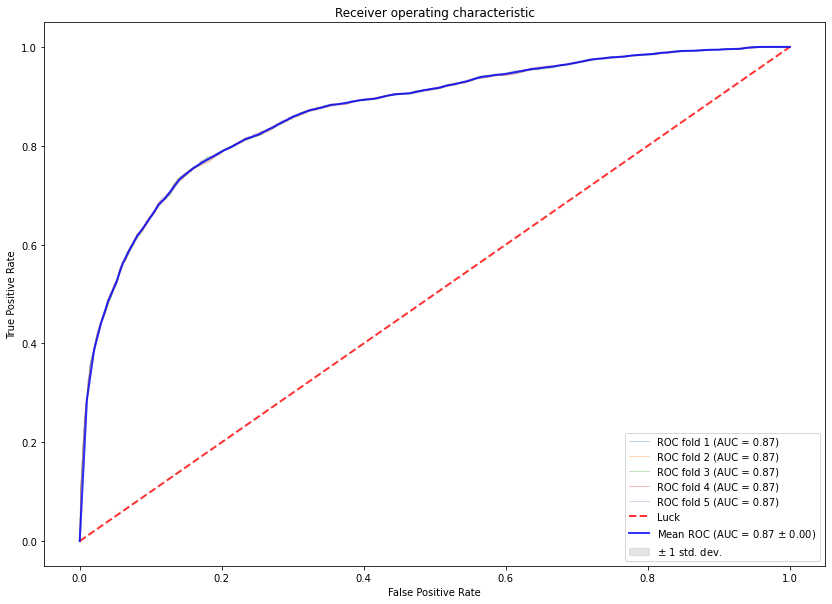

   AUC Train  AUC Test
0   0.863057  0.868745
1   0.860786  0.868601
2   0.859025  0.868772
3   0.858235  0.868535
4   0.860451  0.869165

Unique values are..: [0 1]
Accurcy for test data..: 0.7988929889298892
ROC for test data..: 0.8688234837823162

Here is the Confusion Matrix...


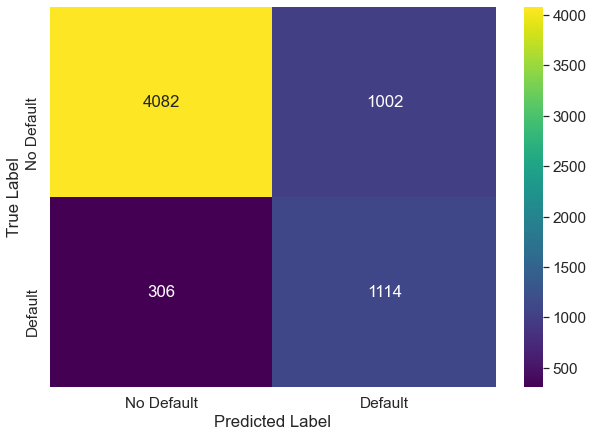

Here is the values count of test data...
{0: 5084, 1: 1420}


In [74]:
#LOGISTIC REGRESSION WITH CLASS WEIGHT
# Train model
clf = clf_a.fit(X_train_1, y_train_1)

# plot roc curve
pred_avg = roc(X_train_1, X_test_1, y_train_1, y_test_1, clf)

## 1. Logistic Regression with Class Weight

In [75]:
clf_a = Pipeline([
    ('encoder', Custom_Encoder(binary_columns=binary_columns, ordinal_columns=ordinal_columns, nominal_columns=nominal_columns, loan_grade_map=loan_grade_map, cb_person_default_on_file_map=cb_person_default_on_file_map)),    
    ("inputer", SimplePandasInputer(missing_values=np.nan, strategy="median")), # most_frequent, mean, constant
    ('group_columns', SumByPrefixes(groups_prefixes, drop=False)), # can be comment out
    ('var_selector', VarianceThreshold(threshold=0.0)), # not used!
    ('kbest_selector', SelectKBest(chi2, k='all')), # not used!
    ("from_model_selector", SelectFromModel(estimator=LogisticRegression(), threshold=-np.inf)), # not used
    ('scaler', MinMaxScaler()), # try with not used!
    (
        "clf",
        LogisticRegression(),
    ),
])


Evaluation results for fold 1 ..: 
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels

[[4867  217]
 [ 710  710]]


accuracy: 0.8574723247232472
precision: 0.7659115426105717
recall: 0.5
f1 score: 0.6050276949296975
None

Evaluation results for fold 2 ..: 
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels

[[4867  217]
 [ 713  707]]


accuracy: 0.8570110701107011
precision: 0.7651515151515151
recall: 0.497887323943662
f1 score: 0.6032423208191126
None

Evaluation results for fold 3 ..: 
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels

[[4862  222]
 [ 710  710]]


accuracy: 0.8567035670356704
precision: 0.7618025751072961
recall: 0.5
f1 score: 0.6037414965986394
None

Evaluation results for fold 4 ..: 
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels

[[4872  212]
 [ 712  708]]


accuracy: 0.8579335793357934
precision: 0.76956

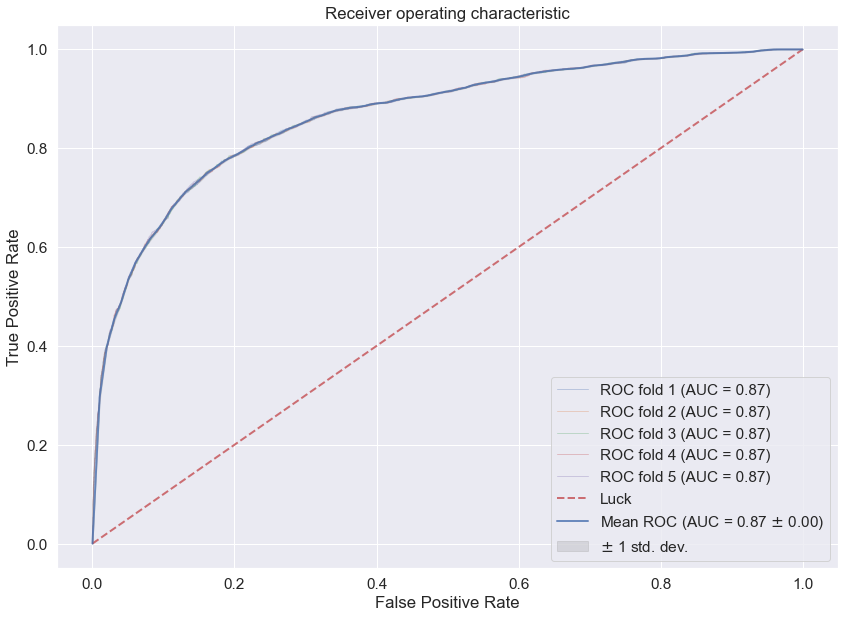

   AUC Train  AUC Test
0   0.862324  0.867089
1   0.860082  0.867460
2   0.858426  0.867526
3   0.857527  0.867324
4   0.859859  0.868053

Unique values are..: [0 1]
Accurcy for test data..: 0.857779827798278
ROC for test data..: 0.8675347126029189

Here is the Confusion Matrix...


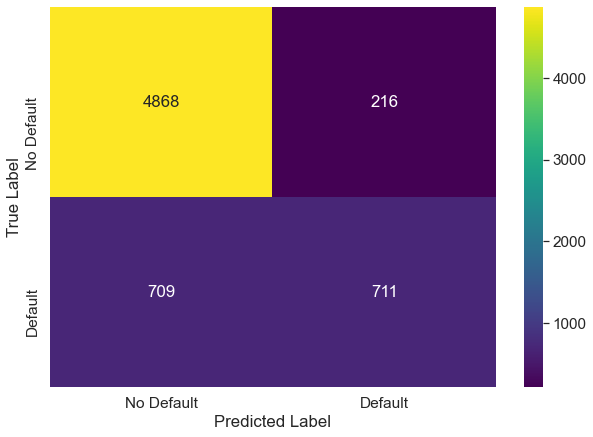

Here is the values count of test data...
{0: 5084, 1: 1420}


In [76]:
#LOGISTIC REGRESSION WITHOUT CLASS WEIGHT
# Train model
clf = clf_a.fit(X_train_1, y_train_1)

# plot roc curve
pred_avg = roc(X_train_1, X_test_1, y_train_1, y_test_1, clf)

> Both logistic regression with/without class weight models have similar performance.

## Upsample Minority Class Size to Majority Class Size

In [77]:
# Separate majority and minority classes
df_majority = df[df.loan_status == 0]
df_minority = df[df.loan_status == 1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=25473,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
print(df_upsampled.loan_status.value_counts())

X_1 = df_upsampled.copy()
X_1 = X_1.drop(['loan_status'], axis=1)

numeric_columns = X_1.select_dtypes(exclude = 'object').columns

y_1 = df_upsampled['loan_status'].copy()

outlier_index = IQR_Outliers(X_1, numeric_columns)

indices = [x for x in X_1.index]
outlier_index = list(set(outlier_index))
clean_data = np.setdiff1d(indices,outlier_index)

X_1 = X_1.loc[clean_data]

y_1 = y_1.loc[clean_data]

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_1, y_1, test_size=VALIDATION_SIZE, random_state=7)

X_train_2.shape, X_test_2.shape, y_train_2.shape, y_test_2.shape

1    25473
0    25467
Name: loan_status, dtype: int64
# of features:  7
Features:  Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')
Number of samples:  50940

Feature:  person_age
Upper and Lower limits:  100.0 -47.0
Number of outliers:  0
Outliers Index:  []
Outliers:  []

Feature:  person_income
Upper and Lower limits:  463000.0 -356000.0
Number of outliers:  85
Outliers Index:  [15, 15915, 17833, 17834, 17846, 17847, 17848, 18635, 18917, 21462, 21958, 23429, 23431, 27798, 27875, 27877, 27882, 27883, 27884, 28253, 28633, 28796, 29025, 29119, 29120, 29121, 29122, 29126, 29128, 29131, 29133, 29345, 29514, 30049, 30536, 31911, 31912, 31913, 31915, 31916, 31918, 31919, 31921, 31922, 31924, 32037, 32070, 32291, 32298, 32300, 32303, 32497, 32543, 32544, 32546, 32551, 28770, 28770, 31914, 27881, 27881, 31914, 29129, 17840, 31914, 27881, 17849, 29127, 27881, 31914, 27881

((40684, 11), (10171, 11), (40684,), (10171,))

In [78]:
unique, counts = np.unique(y_test_2, return_counts=True)
print(dict(zip(unique, counts)))

{0: 5092, 1: 5079}


In [79]:
clf_a = Pipeline([
    ('encoder', Custom_Encoder(binary_columns=binary_columns, ordinal_columns=ordinal_columns, nominal_columns=nominal_columns, loan_grade_map=loan_grade_map, cb_person_default_on_file_map=cb_person_default_on_file_map)),    
    ("inputer", SimplePandasInputer(missing_values=np.nan, strategy="median")), # most_frequent, mean, constant
    ('group_columns', SumByPrefixes(groups_prefixes, drop=False)), # can be comment out
    ('var_selector', VarianceThreshold(threshold=0.0)), # not used!
    ('kbest_selector', SelectKBest(chi2, k='all')), # not used!
    ("from_model_selector", SelectFromModel(estimator=LogisticRegression(), threshold=-np.inf)), # not used
    ('scaler', MinMaxScaler()), # try with not used!
    (
        "clf",
        LogisticRegression(),
    ),
])


Evaluation results for fold 1 ..: 
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels

[[4043 1049]
 [1126 3953]]


accuracy: 0.7861567200865205
precision: 0.7902838864454218
recall: 0.7783028155148651
f1 score: 0.7842475944846741
None

Evaluation results for fold 2 ..: 
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels

[[4030 1062]
 [1103 3976]]


accuracy: 0.7871399075803756
precision: 0.7892020643112346
recall: 0.7828312659972435
f1 score: 0.7860037560541663
None

Evaluation results for fold 3 ..: 
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels

[[4026 1066]
 [1120 3959]]


accuracy: 0.7850752138432799
precision: 0.787860696517413
recall: 0.7794841504233117
f1 score: 0.7836500395882819
None

Evaluation results for fold 4 ..: 
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels

[[4030 1062]
 [1108 3971]]


accuracy: 0.78664

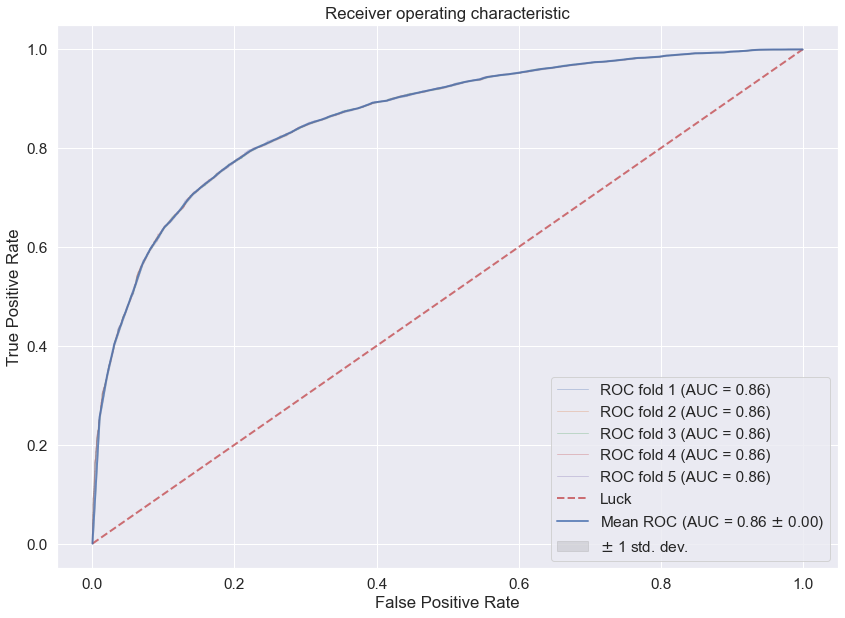

   AUC Train  AUC Test
0   0.867026  0.863659
1   0.864519  0.863720
2   0.864864  0.863792
3   0.862644  0.863645
4   0.864691  0.863877

Unique values are..: [0 1]
Accurcy for test data..: 0.786451676334677
ROC for test data..: 0.8637663177877516

Here is the Confusion Matrix...


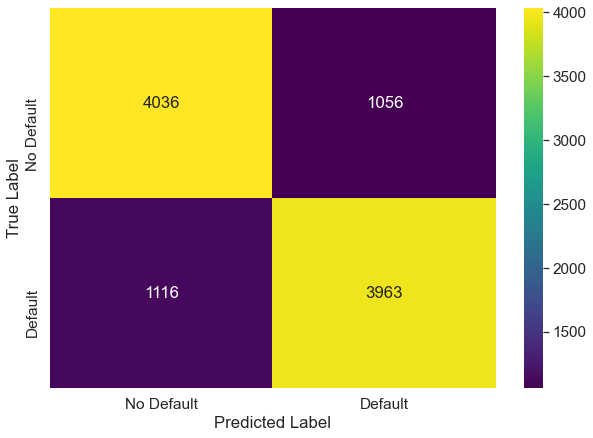

Here is the values count of test data...
{0: 5092, 1: 5079}


In [80]:
#LOGISTIC REGRESSION WITH UPSAMPLED DATA
# Train model
clf = clf_a.fit(X_train_2, y_train_2)

# plot roc curve
pred_avg = roc(X_train_2, X_test_2, y_train_2, y_test_2, clf)

> Again similar balance with logistic regression.

## Downsample Majority Class Size to Minority Class Size

In [81]:
# Separate majority and minority classes
df_majority = df[df.loan_status == 0]
df_minority = df[df.loan_status == 1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=7108,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
print(df_downsampled.loan_status.value_counts())

X_2 = df_downsampled.copy()
X_2 = X_2.drop(['loan_status'], axis=1)

numeric_columns = X_2.select_dtypes(exclude = 'object').columns

y_2 = df_downsampled['loan_status'].copy()

outlier_index = IQR_Outliers(X_2, numeric_columns)

indices = [x for x in X_2.index]
outlier_index = list(set(outlier_index))
clean_data = np.setdiff1d(indices,outlier_index)

X_2 = X_2.loc[clean_data]

y_2 = y_2.loc[clean_data]

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_2, y_2, test_size=600, random_state=2)

X_train_3.shape, X_test_3.shape, y_train_3.shape, y_test_3.shape

0    7108
1    7107
Name: loan_status, dtype: int64
# of features:  7
Features:  Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')
Number of samples:  14215

Feature:  person_age
Upper and Lower limits:  100.0 -47.0
Number of outliers:  0
Outliers Index:  []
Outliers:  []

Feature:  person_income
Upper and Lower limits:  452040.0 -346044.0
Number of outliers:  20
Outliers Index:  [28253, 21462, 31911, 31919, 32546, 32303, 27877, 21958, 29121, 31916, 29345, 32544, 17840, 17849, 25714, 27881, 28770, 29127, 29129, 31914]
Outliers:  [ 762000  612000  550000  828000 1900000  500000  522000  564000  900000
  780000  889000  780000  648000  468000  703800  604000  604000  584800
  540600  499800]

Feature:  person_emp_length
Upper and Lower limits:  67.0 -59.0
Number of outliers:  0
Outliers Index:  []
Outliers:  []

Feature:  loan_amnt
Upper and Lower limits:  104000.0 -8

((13595, 11), (600, 11), (13595,), (600,))

In [82]:
unique, counts = np.unique(y_test_3, return_counts=True)
print(dict(zip(unique, counts)))

{0: 312, 1: 288}


In [83]:
clf_a = Pipeline([
    ('encoder', Custom_Encoder(binary_columns=binary_columns, ordinal_columns=ordinal_columns, nominal_columns=nominal_columns, loan_grade_map=loan_grade_map, cb_person_default_on_file_map=cb_person_default_on_file_map)),    
    ("inputer", SimplePandasInputer(missing_values=np.nan, strategy="median")), # most_frequent, mean, constant
    ('group_columns', SumByPrefixes(groups_prefixes, drop=False)), # can be comment out
    ('var_selector', VarianceThreshold(threshold=0.0)), # not used!
    ('kbest_selector', SelectKBest(chi2, k='all')), # not used!
    ("from_model_selector", SelectFromModel(estimator=LogisticRegression(), threshold=-np.inf)), # not used
    ('scaler', MinMaxScaler()), # try with not used!
    (
        "clf",
        LogisticRegression(),
    ),
])


Evaluation results for fold 1 ..: 
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels

[[266  46]
 [ 97 191]]


accuracy: 0.7616666666666667
precision: 0.8059071729957806
recall: 0.6631944444444444
f1 score: 0.7276190476190476
None

Evaluation results for fold 2 ..: 
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels

[[269  43]
 [ 97 191]]


accuracy: 0.7666666666666667
precision: 0.8162393162393162
recall: 0.6631944444444444
f1 score: 0.731800766283525
None

Evaluation results for fold 3 ..: 
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels

[[260  52]
 [ 97 191]]


accuracy: 0.7516666666666667
precision: 0.7860082304526749
recall: 0.6631944444444444
f1 score: 0.71939736346516
None

Evaluation results for fold 4 ..: 
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels

[[265  47]
 [ 96 192]]


accuracy: 0.7616666666666667
precis

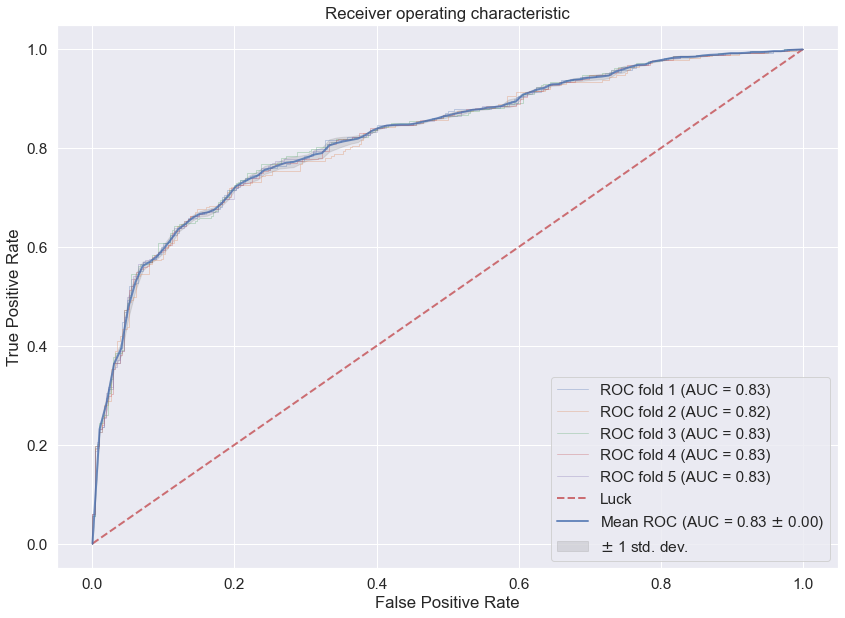

   AUC Train  AUC Test
0   0.870506  0.826956
1   0.870013  0.822238
2   0.870474  0.828292
3   0.869875  0.825510
4   0.870344  0.826600

Unique values are..: [0 1]
Accurcy for test data..: 0.76
ROC for test data..: 0.8262219551282051

Here is the Confusion Matrix...


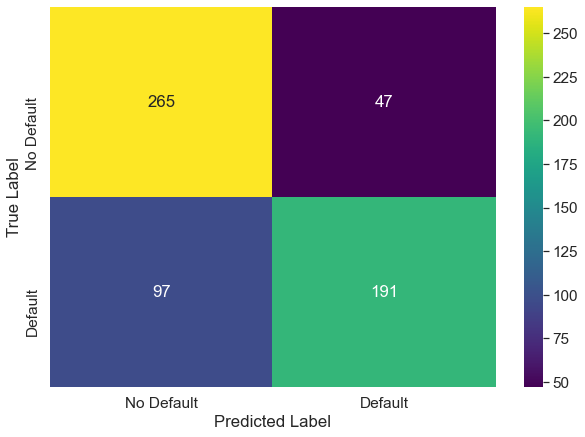

Here is the values count of test data...
{0: 312, 1: 288}


In [84]:
#LOGISTIC REGRESSION WITH DOWNSAPMLED DATA
# Train model
clf = clf_a.fit(X_train_3, y_train_3)

# plot roc curve
pred_avg = roc(X_train_3, X_test_3, y_train_3, y_test_3, clf)

> Logistic regression with downsampled data has worse performance.

## Linear Regression with Regularization (Ridge)

In [85]:
clf_a = Pipeline([
    ('encoder', Custom_Encoder(binary_columns=binary_columns, ordinal_columns=ordinal_columns, nominal_columns=nominal_columns, loan_grade_map=loan_grade_map, cb_person_default_on_file_map=cb_person_default_on_file_map)),    
    ("inputer", SimplePandasInputer(missing_values=np.nan, strategy="median")), # most_frequent, mean, constant
    ('group_columns', SumByPrefixes(groups_prefixes, drop=False)), # can be comment out
    ('var_selector', VarianceThreshold(threshold=0.0)), # not used!
    ('kbest_selector', SelectKBest(chi2, k='all')), # not used!
    ("from_model_selector", SelectFromModel(estimator=LogisticRegression(), threshold=-np.inf)), # not used
    ('scaler', MinMaxScaler()), # try with not used!
    (
        "clf",
        RidgeClassifier(),
    ),
])

[0 1]
Accuracy..: 0.8563960639606396


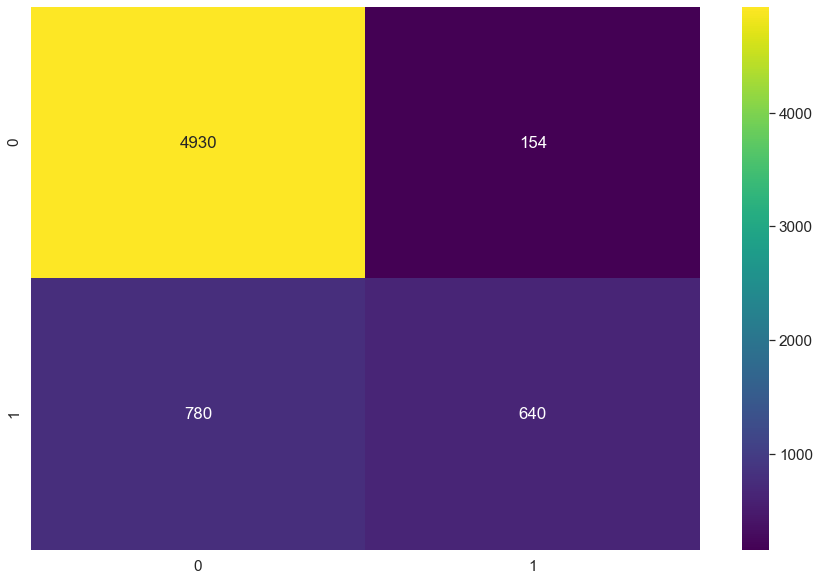

In [86]:
# model for ridge linear regression
clf = clf_a.fit(X_train_1, y_train_1)

# Predict on training set
pred = clf.predict(X_test_1)

# Should we be excited?
print( np.unique( pred ) )

# How's the accuracy?
print("Accuracy..:", accuracy_score(pred, y_test_1) )

# confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test_1,pred),cmap='viridis',annot=True,fmt='d')
plt.show()

> Similar performance with logistic regression. Not good at target class classification.

## XGBClassifier

In [87]:
clf_a = Pipeline([
    ('encoder', Custom_Encoder(binary_columns=binary_columns, ordinal_columns=ordinal_columns, nominal_columns=nominal_columns, loan_grade_map=loan_grade_map, cb_person_default_on_file_map=cb_person_default_on_file_map)),    
    ("inputer", SimplePandasInputer(missing_values=np.nan, strategy="median")), # most_frequent, mean, constant
    ('group_columns', SumByPrefixes(groups_prefixes, drop=False)), # can be comment out
    ('var_selector', VarianceThreshold(threshold=0.0)), # not used!
    ('kbest_selector', SelectKBest(chi2, k='all')), # not used!
    ("from_model_selector", SelectFromModel(estimator=LogisticRegression(), threshold=-np.inf)), # not used
    ('scaler', MinMaxScaler()), # try with not used!
    (
        "clf",
        XGBClassifier(),
    ),
])


Evaluation results for fold 1 ..: 
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels

[[5042   42]
 [ 390 1030]]


accuracy: 0.933579335793358
precision: 0.960820895522388
recall: 0.7253521126760564
f1 score: 0.8266452648475121
None

Evaluation results for fold 2 ..: 
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels

[[5039   45]
 [ 394 1026]]


accuracy: 0.9325030750307504
precision: 0.957983193277311
recall: 0.7225352112676057
f1 score: 0.8237655560016058
None

Evaluation results for fold 3 ..: 
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels

[[5046   38]
 [ 389 1031]]


accuracy: 0.9343480934809348
precision: 0.9644527595884004
recall: 0.726056338028169
f1 score: 0.8284451586982723
None

Evaluation results for fold 4 ..: 
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels

[[5033   51]
 [ 397 1023]]


accuracy: 0.93111931

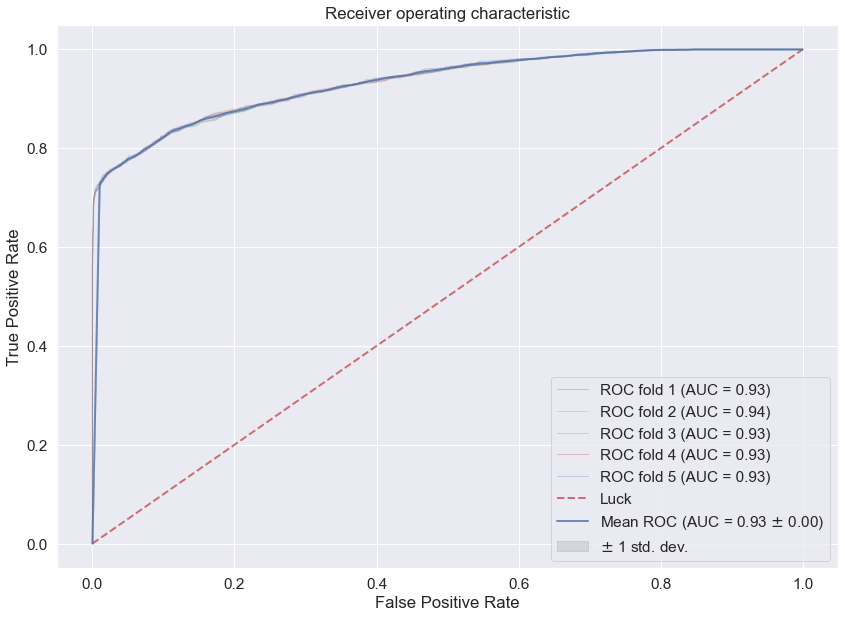

   AUC Train  AUC Test
0   0.937911  0.934880
1   0.938090  0.935165
2   0.935955  0.933434
3   0.934777  0.933496
4   0.937678  0.934640

Unique values are..: [0 1]
Accurcy for test data..: 0.9329643296432965
ROC for test data..: 0.9347474401879412

Here is the Confusion Matrix...


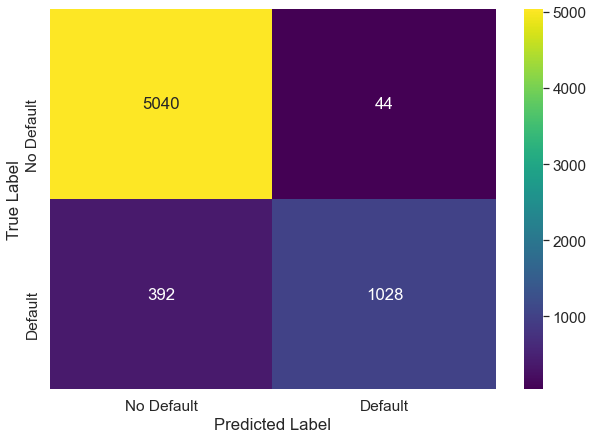

Here is the values count of test data...
{0: 5084, 1: 1420}


In [88]:
#XGBClassifier
# Train model
clf = clf_a.fit(X_train_1, y_train_1)

# plot roc curve
predictions = roc(X_train_1, X_test_1, y_train_1, y_test_1, clf)

> Better Performance.

## Random Forest Classifier

In [89]:
clf_a = Pipeline([
    ('encoder', Custom_Encoder(binary_columns=binary_columns, ordinal_columns=ordinal_columns, nominal_columns=nominal_columns, loan_grade_map=loan_grade_map, cb_person_default_on_file_map=cb_person_default_on_file_map)),    
    ("inputer", SimplePandasInputer(missing_values=np.nan, strategy="median")), # most_frequent, mean, constant
    ('group_columns', SumByPrefixes(groups_prefixes, drop=False)), # can be comment out
    ('var_selector', VarianceThreshold(threshold=0.0)), # not used!
    ('kbest_selector', SelectKBest(chi2, k='all')), # not used!
    ("from_model_selector", SelectFromModel(estimator=LogisticRegression(), threshold=-np.inf)), # not used
    ('scaler', MinMaxScaler()), # try with not used!
    (
        "clf",
        RandomForestClassifier(),
    ),
])


Evaluation results for fold 1 ..: 
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels

[[5057   27]
 [ 391 1029]]


accuracy: 0.9357318573185732
precision: 0.9744318181818182
recall: 0.7246478873239437
f1 score: 0.8311793214862682
None

Evaluation results for fold 2 ..: 
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels

[[5056   28]
 [ 388 1032]]


accuracy: 0.9360393603936039
precision: 0.9735849056603774
recall: 0.7267605633802817
f1 score: 0.832258064516129
None

Evaluation results for fold 3 ..: 
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels

[[5048   36]
 [ 393 1027]]


accuracy: 0.934040590405904
precision: 0.9661335841956726
recall: 0.7232394366197183
f1 score: 0.8272251308900523
None

Evaluation results for fold 4 ..: 
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels

[[5049   35]
 [ 387 1033]]


accuracy: 0.935116

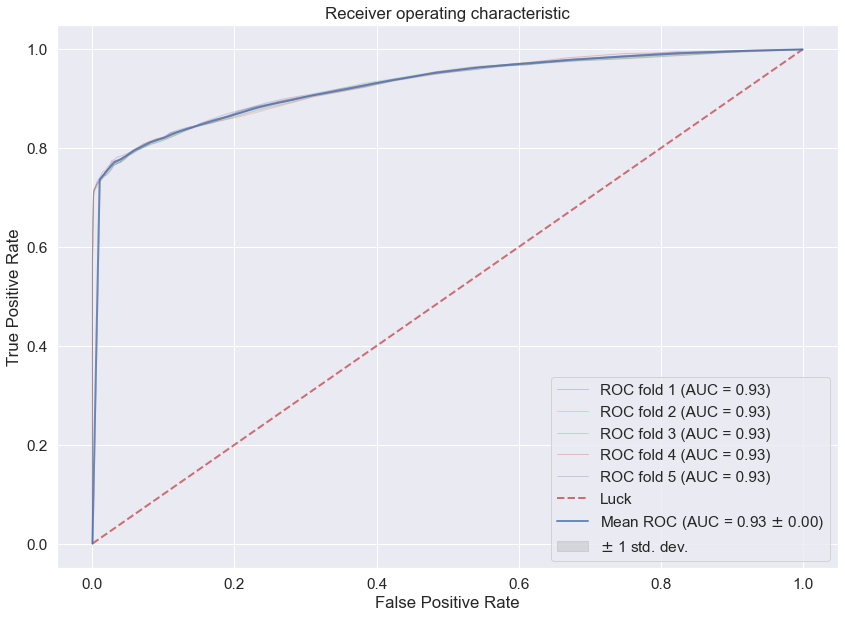

   AUC Train  AUC Test
0        1.0  0.929123
1        1.0  0.927723
2        1.0  0.928713
3        1.0  0.930800
4        1.0  0.930681

Unique values are..: [0 1]
Accurcy for test data..: 0.9354243542435424
ROC for test data..: 0.933053157655611

Here is the Confusion Matrix...


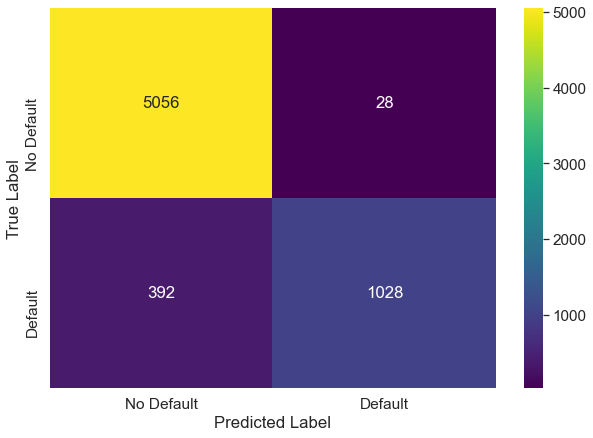

Here is the values count of test data...
{0: 5084, 1: 1420}


In [90]:
#LOGISTIC REGRESSION WITH CLASS WEIGHT
# Train model
clf = clf_a.fit(X_train_1, y_train_1)

# plot roc curve
predictions = roc(X_train_1, X_test_1, y_train_1, y_test_1, clf)

> Better than XGB Classifier.

## LGBM Classifier

In [91]:
clf_a = Pipeline([
    ('encoder', Custom_Encoder(binary_columns=binary_columns, ordinal_columns=ordinal_columns, nominal_columns=nominal_columns, loan_grade_map=loan_grade_map, cb_person_default_on_file_map=cb_person_default_on_file_map)),    
    ("inputer", SimplePandasInputer(missing_values=np.nan, strategy="median")), # most_frequent, mean, constant
    ('group_columns', SumByPrefixes(groups_prefixes, drop=False)), # can be comment out
    ('var_selector', VarianceThreshold(threshold=0.0)), # not used!
    ('kbest_selector', SelectKBest(chi2, k='all')), # not used!
    ("from_model_selector", SelectFromModel(estimator=LogisticRegression(), threshold=-np.inf)), # not used
    ('scaler', MinMaxScaler()), # try with not used!
    (
        "clf",
        LGBMClassifier(),
    ),
])


Evaluation results for fold 1 ..: 
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels

[[5053   31]
 [ 371 1049]]


accuracy: 0.9381918819188192
precision: 0.9712962962962963
recall: 0.7387323943661972
f1 score: 0.8392000000000001
None

Evaluation results for fold 2 ..: 
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels

[[5063   21]
 [ 374 1046]]


accuracy: 0.9392681426814268
precision: 0.9803186504217432
recall: 0.7366197183098592
f1 score: 0.8411741053478086
None

Evaluation results for fold 3 ..: 
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels

[[5056   28]
 [ 375 1045]]


accuracy: 0.9380381303813038
precision: 0.9739049394221808
recall: 0.7359154929577465
f1 score: 0.8383473726434015
None

Evaluation results for fold 4 ..: 
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels

[[5060   24]
 [ 372 1048]]


accuracy: 0.9391

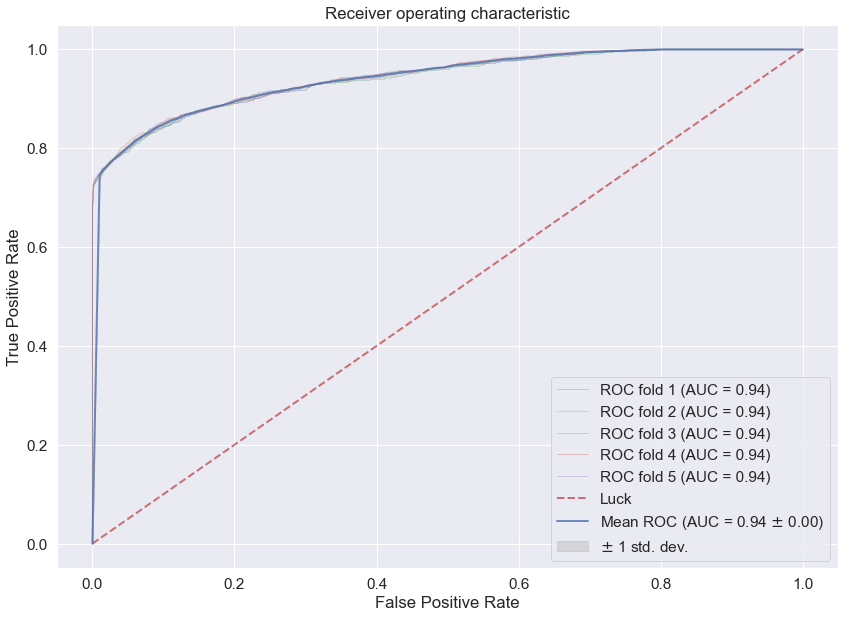

   AUC Train  AUC Test
0   0.984712  0.942869
1   0.985180  0.944125
2   0.983957  0.942054
3   0.985747  0.944401
4   0.986710  0.944588

Unique values are..: [0 1]
Accurcy for test data..: 0.9395756457564576
ROC for test data..: 0.9458752119324919

Here is the Confusion Matrix...


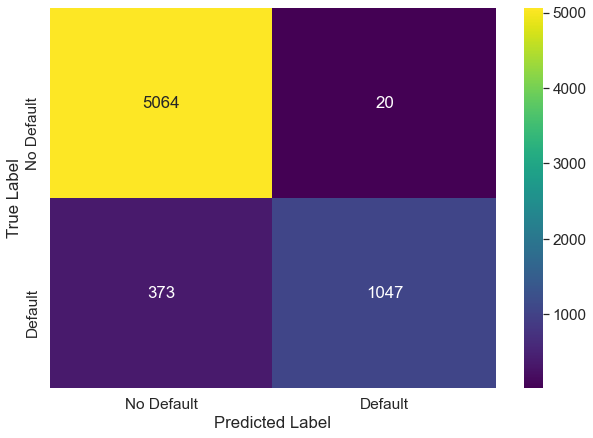

Here is the values count of test data...
{0: 5084, 1: 1420}


In [92]:
#LOGISTIC REGRESSION WITH CLASS WEIGHT
# Train model
clf = clf_a.fit(X_train_1, y_train_1)

# plot roc curve
predictions = roc(X_train_1, X_test_1, y_train_1, y_test_1, clf)

**Best performance has been detected with LGBM Classifier.** \
Lets move on ``LGMB Classifier`` with parameter tuning for classifier and pipeline variables in ``Grid Search``.


# PART 5: Tune Pipeline Variables and Hyperparameter of LGBM Classifier(Best Classifier selected in previous step) in Grid Search

In [93]:
clf = Pipeline([
    ('encoder', Custom_Encoder(binary_columns=binary_columns, ordinal_columns=ordinal_columns, nominal_columns=nominal_columns, loan_grade_map=loan_grade_map, cb_person_default_on_file_map=cb_person_default_on_file_map)),    
    ("inputer", SimplePandasInputer(missing_values=np.nan, strategy="most_frequent")), # median, mean, constant
    ('group_columns', SumByPrefixes(groups_prefixes, drop=False)), # can be comment out
    ('var_selector', VarianceThreshold(threshold=0.0)), # not used!
    ('kbest_selector', SelectKBest(chi2, k='all')), # not used!
    ("from_model_selector", SelectFromModel(estimator=LogisticRegression(), threshold=-np.inf)), # not used
    ('scaler', MinMaxScaler()),
    (
        "clf",
        LGBMClassifier(max_depth=8, num_leaves=50),
    ),
])

### Grid Search Parameters

In [94]:
# param_grid = [{
#     'clf__max_depth': [-1,5,8,15,25,30],
#     'clf__num_leaves': [10, 20, 31, 40, 50],
#     'inputer__strategy': ['median', 'most_frequent', 'mean'],
#     'from_model_selector__estimator': [LogisticRegression()],
#     'from_model_selector__threshold': [-np.inf],
#     'kbest_selector__k': ['all'],
#     'var_selector__threshold': [0.0],
# }]

BASED ON THE GRID SEARCH RESULTS...\
best_estimator is:
- clf__max_depth = -1,
- clf__num_leaves = 30,
- inputer__strategy = 'most_frequent'\
These parameters applied below parameter grid.

In [95]:
param_grid = [{
    'clf__max_depth': [-1],
    'clf__num_leaves': [31],
    'inputer__strategy': ['most_frequent'],
    'from_model_selector__estimator': [LogisticRegression()],
    'from_model_selector__threshold': [-np.inf],
    'kbest_selector__k': ['all'],
    'var_selector__threshold': [0.0],
}]

In [96]:
# Grid Search specs.
scores = ['precision_macro', 'recall_macro', 'f1_macro', 'roc_auc']
decision_score = 'roc_auc'
grid_search_n_splits = 5
grid_search_n_repeats = 1
# fit_params={"early_stopping_rounds":42}

### Cross Validation

In [97]:
#cross-validation
cv = RepeatedStratifiedKFold(n_splits=grid_search_n_splits, n_repeats=grid_search_n_repeats, random_state=SEED)

#### Run Grid Seach with RepeatedStratifiedKFold Cross Validation and Given Specs Below

- ``scores`` = ['precision_macro', 'recall_macro', 'f1_macro', 'roc_auc']
- ``decision_score`` = 'roc_auc'
- ``grid_search_n_splits`` = 5
- ``grid_search_n_repeats`` = 1

### Grid_Search

In [98]:
%%time
# we pass everything to grid search algorithm and fit
grid_search = GridSearchCV(clf, param_grid, cv=cv, n_jobs=-1, refit=decision_score, scoring=scores, verbose=1)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.3s finished


Wall time: 5.95 s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=1, n_splits=5, random_state=313),
             estimator=Pipeline(steps=[('encoder',
                                        Custom_Encoder(binary_columns=['cb_person_default_on_file'],
                                                       cb_person_default_on_file_map={'N': 0,
                                                                                      'Y': 1},
                                                       loan_grade_map={'A': 1,
                                                                       'B': 2,
                                                                       'C': 3,
                                                                       'D': 4,
                                                                       'E': 5,
                                                                       'F': 6,
                                                                       'G': 7},
                     

> Grid search training has been done! Let's check the best parameters for pipeline and classifier.

In [99]:
mean_decision_score = grid_search.cv_results_['mean_test_%s' % decision_score]
std__decision_score = grid_search.cv_results_['std_test_%s' % decision_score]
for mean, std, params in zip(mean_decision_score, std__decision_score, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.946 (+/-0.007) for {'clf__max_depth': -1, 'clf__num_leaves': 31, 'from_model_selector__estimator': LogisticRegression(), 'from_model_selector__threshold': -inf, 'inputer__strategy': 'most_frequent', 'kbest_selector__k': 'all', 'var_selector__threshold': 0.0}


In [100]:
print(grid_search.best_params_)

{'clf__max_depth': -1, 'clf__num_leaves': 31, 'from_model_selector__estimator': LogisticRegression(), 'from_model_selector__threshold': -inf, 'inputer__strategy': 'most_frequent', 'kbest_selector__k': 'all', 'var_selector__threshold': 0.0}


#### BEST PARAMETERS:

- ``'clf__max_depth'``: -1,
- ``'clf__num_leaves'``: 31,
- ``'from_model_selector__estimator'``: LogisticRegression(),
- ``'from_model_selector__threshold'``: -inf,
- ``'inputer__strategy'``: 'median',
- ``'kbest_selector__k'``: 'all',
- ``'var_selector__threshold``': 0.0

> Let's see the model performance with best parameters

In [101]:
print(grid_search.best_score_)

0.9460499198995231


In [102]:
grid_search.best_estimator_

Pipeline(steps=[('encoder',
                 Custom_Encoder(binary_columns=['cb_person_default_on_file'],
                                cb_person_default_on_file_map={'N': 0, 'Y': 1},
                                loan_grade_map={'A': 1, 'B': 2, 'C': 3, 'D': 4,
                                                'E': 5, 'F': 6, 'G': 7},
                                nominal_columns=['loan_intent',
                                                 'person_home_ownership'],
                                ordinal_columns=['loan_grade'])),
                ('inputer', SimplePandasInputer(strategy='most_frequent')),
                ('group_columns',
                 SumByPrefixes(prefixes=['person', 'loan', 'cb_person'])),
                ('var_selector', VarianceThreshold()),
                ('kbest_selector',
                 SelectKBest(k='all',
                             score_func=<function chi2 at 0x000001AFEE612948>)),
                ('from_model_selector',
                 Selec

In [103]:
model = grid_search.best_estimator_

# VALIDATION_DATA

accuracy: 0.9384993849938499
precision: 0.9757462686567164
recall: 0.7366197183098592
f1 score: 0.8394863563402889

Unique values are..: [0 1]
Accurcy for test data..: 0.9384993849938499
ROC for test data..: 0.9491530318812955

Here is the Confusion Matrix...


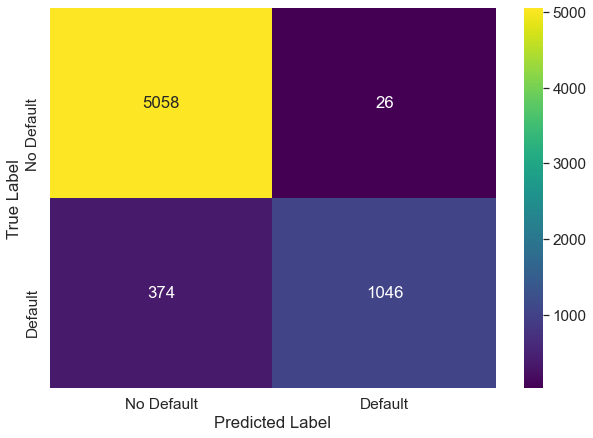

Here is the values count of test data...
{0: 5084, 1: 1420}


In [104]:
_, _, _, y_true, y_predict, y_prob = compute_roc_auc_(X_val, Y_val, model)
evaluate(y_true, y_predict, print_cm=False)
eval_(Y_val, y_predict, y_prob)

In [105]:
print(classification_report(Y_val, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5084
           1       0.98      0.74      0.84      1420

    accuracy                           0.94      6504
   macro avg       0.95      0.87      0.90      6504
weighted avg       0.94      0.94      0.94      6504



## Threshold Optimization

In [106]:
p, r, thresholds = precision_recall_curve(Y_val, y_prob)

Results for threshold is ..: 0.0001
accuracy: 0.21832718327183273
precision: 0.21832718327183273
recall: 1.0
f1 score: 0.3584048460373549


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


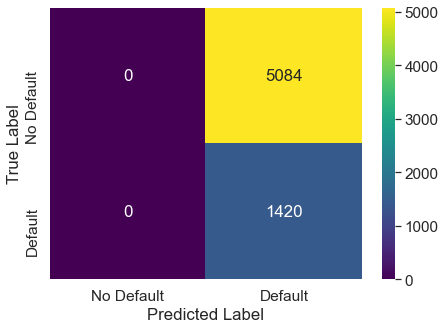

0: Negative Class ~ Clean | 1: Positive Class ~ Malware
{0: 5084, 1: 1420}


Results for threshold is ..: 0.1
accuracy: 0.8053505535055351
precision: 0.5314285714285715
recall: 0.9169014084507042
f1 score: 0.6728682170542636


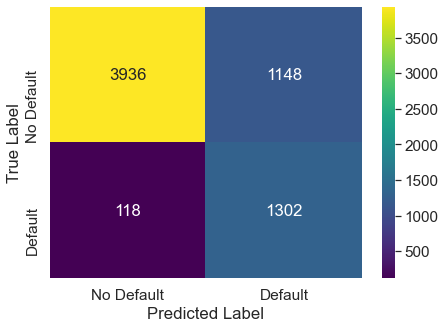

0: Negative Class ~ Clean | 1: Positive Class ~ Malware
{0: 5084, 1: 1420}


Results for threshold is ..: 0.2
accuracy: 0.9083640836408364
precision: 0.7703412073490814
recall: 0.8267605633802817
f1 score: 0.797554347826087


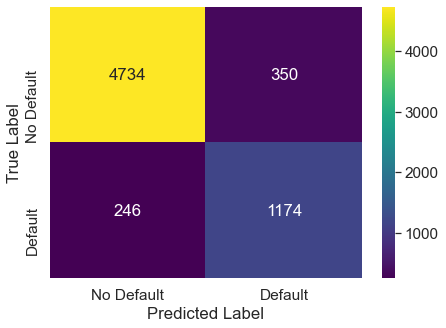

0: Negative Class ~ Clean | 1: Positive Class ~ Malware
{0: 5084, 1: 1420}


Results for threshold is ..: 0.3
accuracy: 0.9315805658056581
precision: 0.8928283642224013
recall: 0.780281690140845
f1 score: 0.8327696354753852


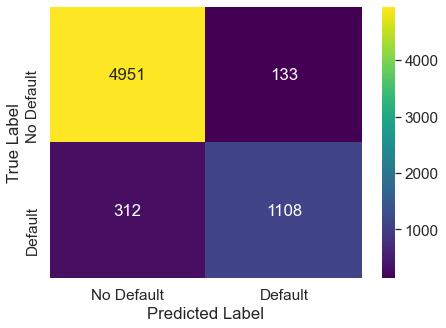

0: Negative Class ~ Clean | 1: Positive Class ~ Malware
{0: 5084, 1: 1420}


Results for threshold is ..: 0.4
accuracy: 0.9358856088560885
precision: 0.9457777777777778
recall: 0.7492957746478873
f1 score: 0.8361493123772102


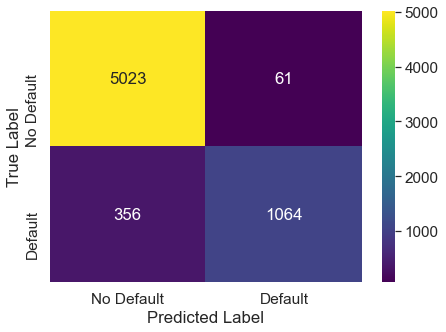

0: Negative Class ~ Clean | 1: Positive Class ~ Malware
{0: 5084, 1: 1420}


Results for threshold is ..: 0.5
accuracy: 0.9384993849938499
precision: 0.9757462686567164
recall: 0.7366197183098592
f1 score: 0.8394863563402889


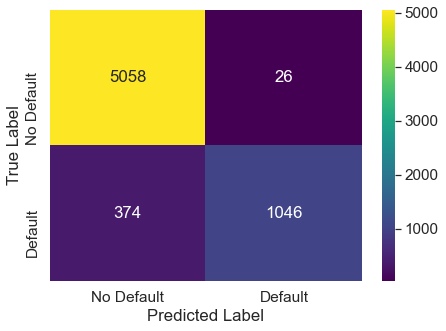

0: Negative Class ~ Clean | 1: Positive Class ~ Malware
{0: 5084, 1: 1420}


Results for threshold is ..: 0.6
accuracy: 0.9384993849938499
precision: 0.9913294797687862
recall: 0.7246478873239437
f1 score: 0.8372660699755899


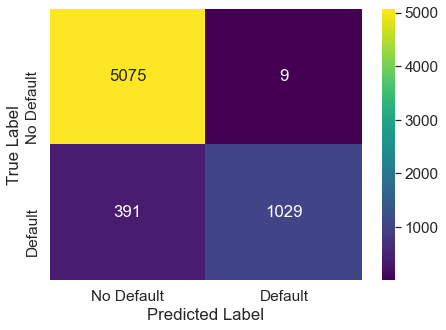

0: Negative Class ~ Clean | 1: Positive Class ~ Malware
{0: 5084, 1: 1420}


Results for threshold is ..: 0.7
accuracy: 0.9360393603936039
precision: 0.995069033530572
recall: 0.7105633802816902
f1 score: 0.829087921117502


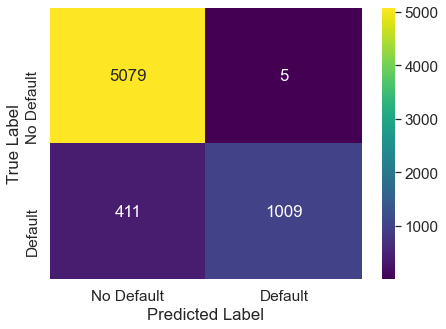

0: Negative Class ~ Clean | 1: Positive Class ~ Malware
{0: 5084, 1: 1420}


Results for threshold is ..: 0.8
accuracy: 0.9348093480934809
precision: 1.0
recall: 0.7014084507042253
f1 score: 0.8245033112582781


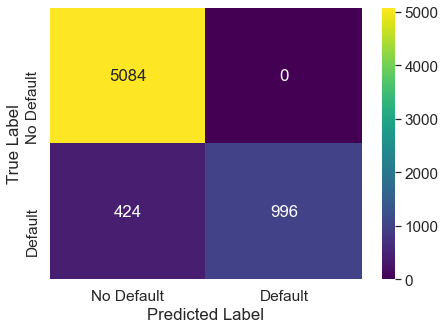

0: Negative Class ~ Clean | 1: Positive Class ~ Malware
{0: 5084, 1: 1420}


Results for threshold is ..: 0.9
accuracy: 0.9300430504305043
precision: 1.0
recall: 0.6795774647887324
f1 score: 0.8092243186582808


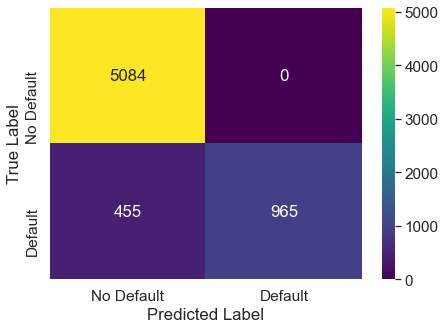

0: Negative Class ~ Clean | 1: Positive Class ~ Malware
{0: 5084, 1: 1420}




In [107]:
ts = [0.0001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
precision_recall_threshold(p, r, thresholds, y_prob, y_true, Y_val, ts)

In [108]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

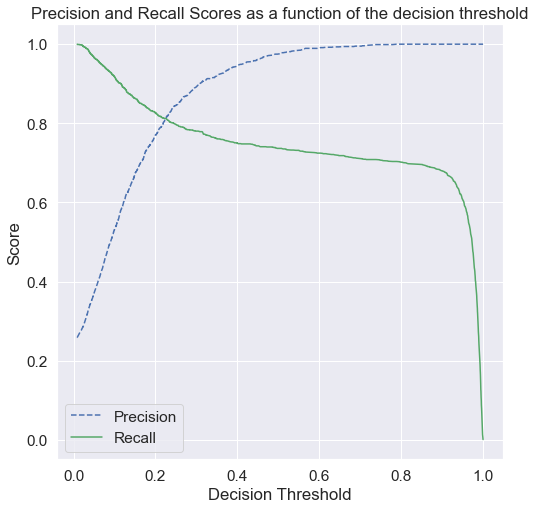

In [109]:
plot_precision_recall_vs_threshold(p, r, thresholds)

#### Results for Optimal Threshold Value with Validation Data

Results for threshold is ..: 0.23
accuracy: 0.9191266912669127
precision: 0.8192857142857143
recall: 0.8077464788732395
f1 score: 0.8134751773049645


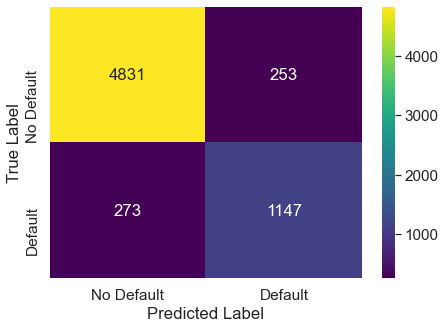

0: Negative Class ~ Clean | 1: Positive Class ~ Malware
{0: 5084, 1: 1420}




In [110]:
precision_recall_threshold(p, r, thresholds, y_prob, y_true, Y_val, [0.23])

In [111]:
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

0.8657528174554804


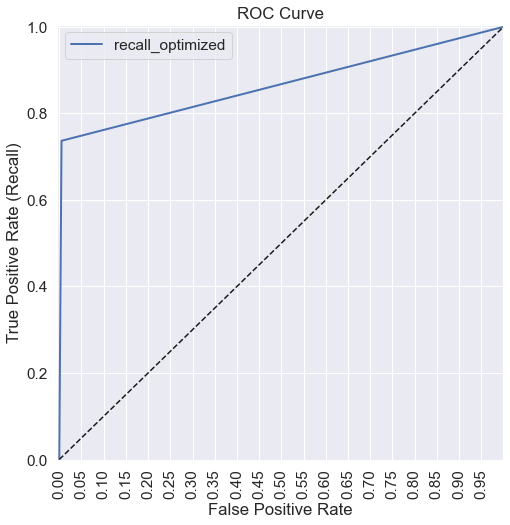

In [112]:
fpr, tpr, auc_thresholds = roc_curve(Y_val, y_predict)
print(auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

# TEST_DATA

## Check Model Performance with Test Data Splitted From the Main Data Before Training (Model Simulation in Production)

accuracy: 0.9315910837817064
precision: 0.9767981438515081
recall: 0.7147707979626485
f1 score: 0.8254901960784313

Unique values are..: [0 1]
Accurcy for test data..: 0.9315910837817064
ROC for test data..: 0.9476703633512896

Here is the Confusion Matrix...


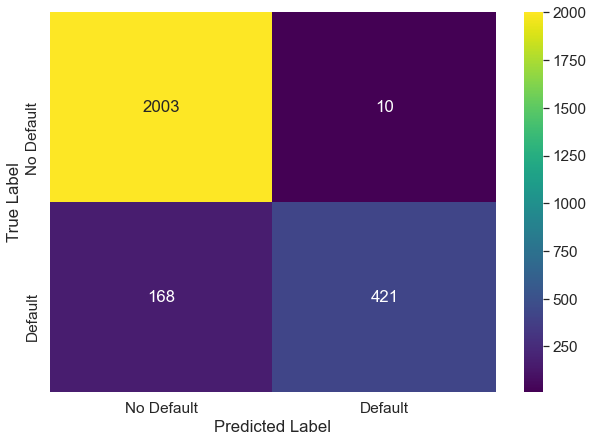

Here is the values count of test data...
{0: 2013, 1: 589}


In [113]:
_, _, _, y_true, y_predict, y_prob = compute_roc_auc_(X_test, Y_test, model)
evaluate(y_true, y_predict, print_cm=False)
eval_(Y_test, y_predict, y_prob)

In [114]:
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2013
           1       0.98      0.71      0.83       589

    accuracy                           0.93      2602
   macro avg       0.95      0.85      0.89      2602
weighted avg       0.93      0.93      0.93      2602



#### Results for Optimal Threshold Value with Validation Data

Results for threshold is ..: 0.23
accuracy: 0.9158339738662568
precision: 0.8388278388278388
recall: 0.7775891341256367
f1 score: 0.8070484581497797


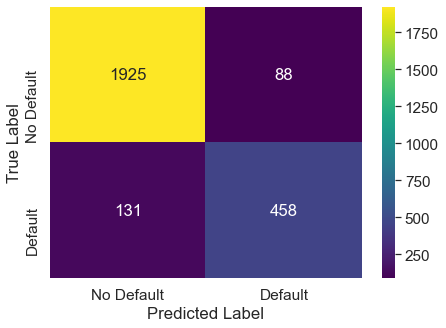

0: Negative Class ~ Clean | 1: Positive Class ~ Malware
{0: 2013, 1: 589}




In [115]:
precision_recall_threshold(p, r, thresholds, y_prob, y_true, Y_test, [0.23])

# PART 6: Important Features

### 6.1 LGBM importances

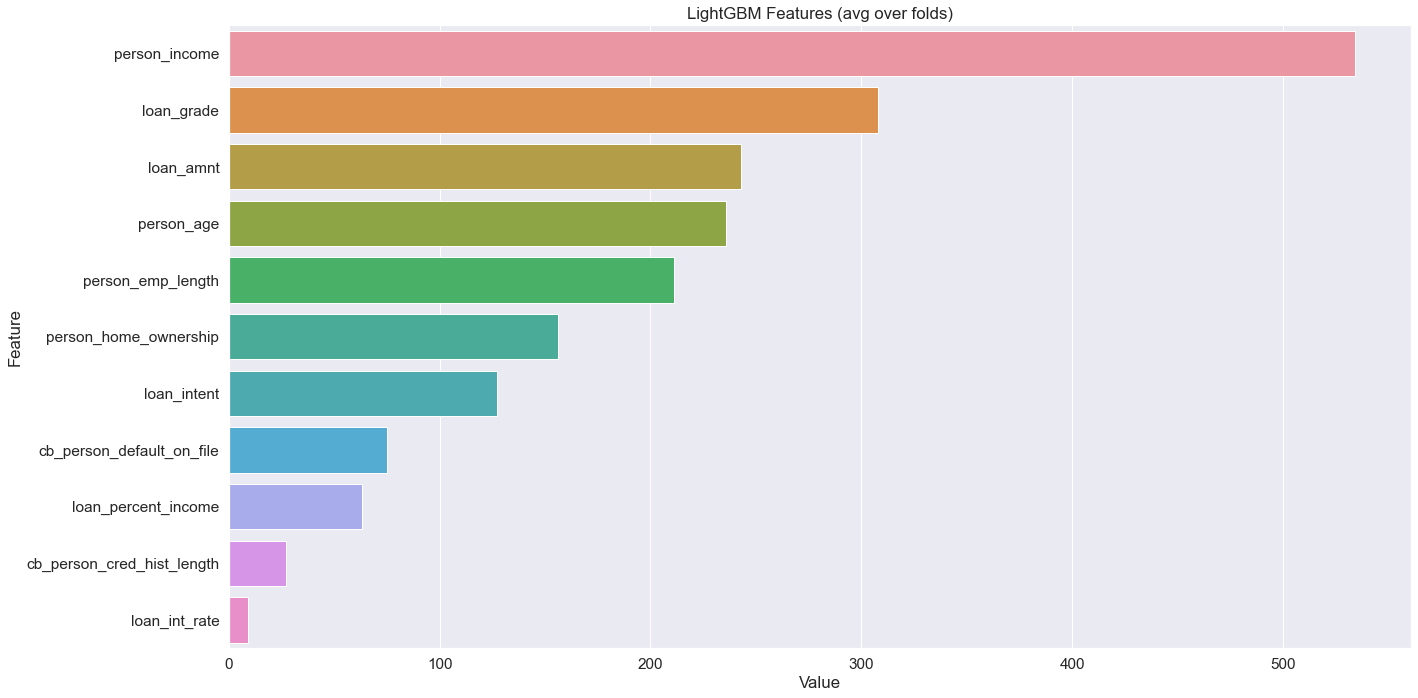

In [116]:
feature_imp = pd.DataFrame(sorted(zip(model['clf'].feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

### 6.2 Permutation importances

The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled.\
This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature.

> Permuation importance can take non-cardinality categorical features into account.

Box Plot represents the variance distribution of every single feature to the output value.

In [117]:
columns = X_test.columns

In [118]:
def plot_importances(importances, columns):
    perm_sorted_idx = importances.importances_mean.argsort()
    fig, ax1 = plt.subplots(1, 1, figsize=(12, 20))
    ax1.boxplot(importances.importances[perm_sorted_idx].T, vert=False, labels=np.array(columns)[perm_sorted_idx])
    fig.tight_layout()
    plt.title("Permutation Importance")
    plt.show()

In [119]:
def plot_importances_all(model, X_test, Y_test, columns, n_repeats=15):
    importances = permutation_importance(model, X_test, Y_test, n_repeats=15, random_state=SEED, n_jobs=-1)
    plot_importances(importances, columns)

#### Permutation importances withot aggregated columns

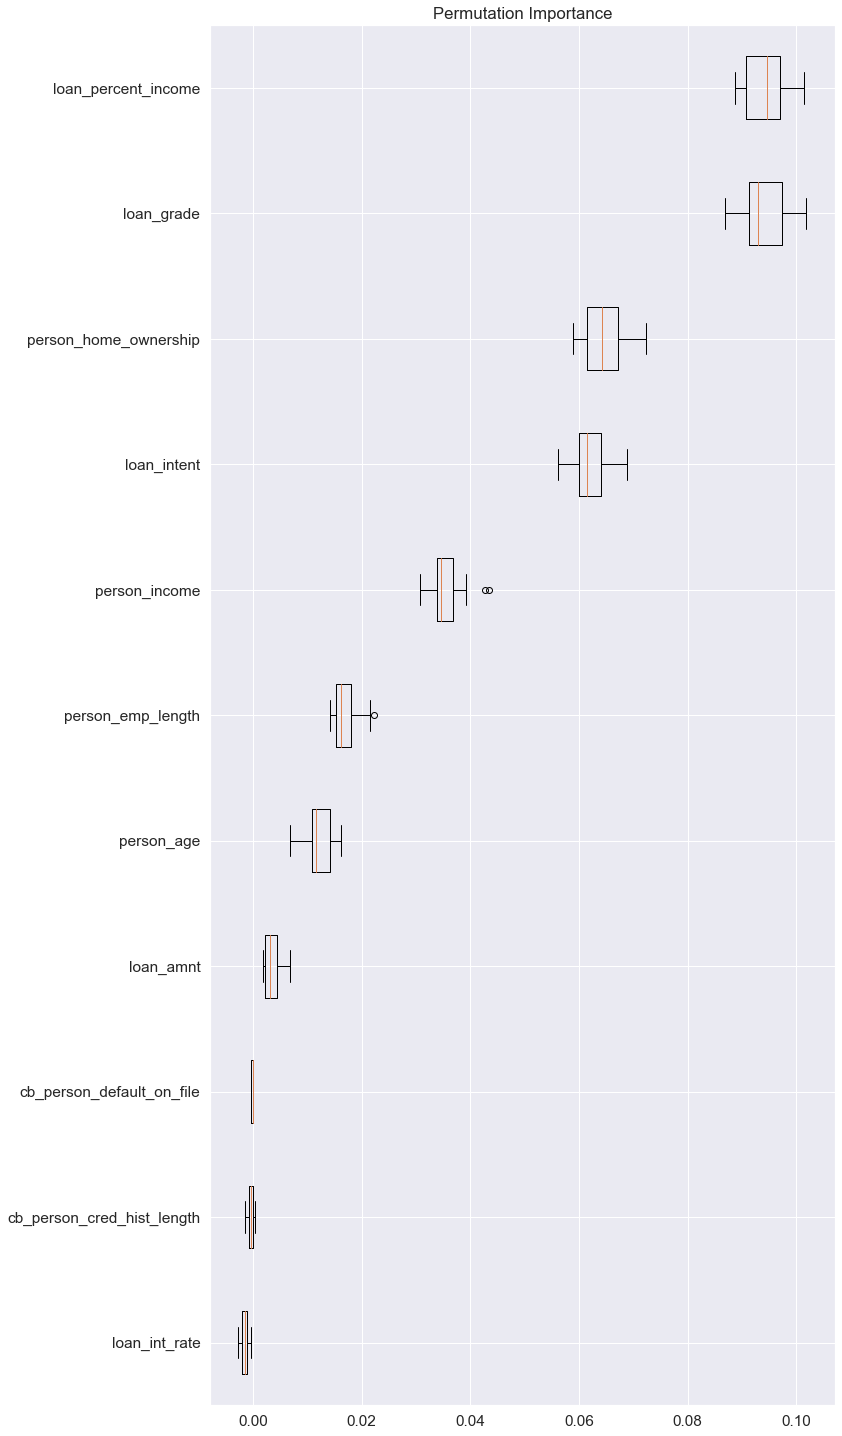

In [120]:
plot_importances_all(model, X_test, Y_test, columns)

#### Permutation importances with aggregated columns

In [121]:
def plot_perm_importances_last(model, X_test, Y_test, n_repeats=15):
    
    def just_transform(self, X):
        """
        Transform without last step
        """
        Xt = X
        for name, transform in self.steps[:-1]:
            Xt = transform.transform(Xt)
        return Xt

    setattr(model, 'just_transform', just_transform)

    col = np.array(model["group_columns"].column_names_)
    
    for step in ['var_selector', 'kbest_selector', 'from_model_selector']:
        support_step = model[step].get_support()
        col = col[support_step]
        
    importances = permutation_importance(model['clf'], model.just_transform(model, X_test), Y_test, n_repeats=n_repeats, random_state=SEED, n_jobs=-1)
    plot_importances(importances, col)

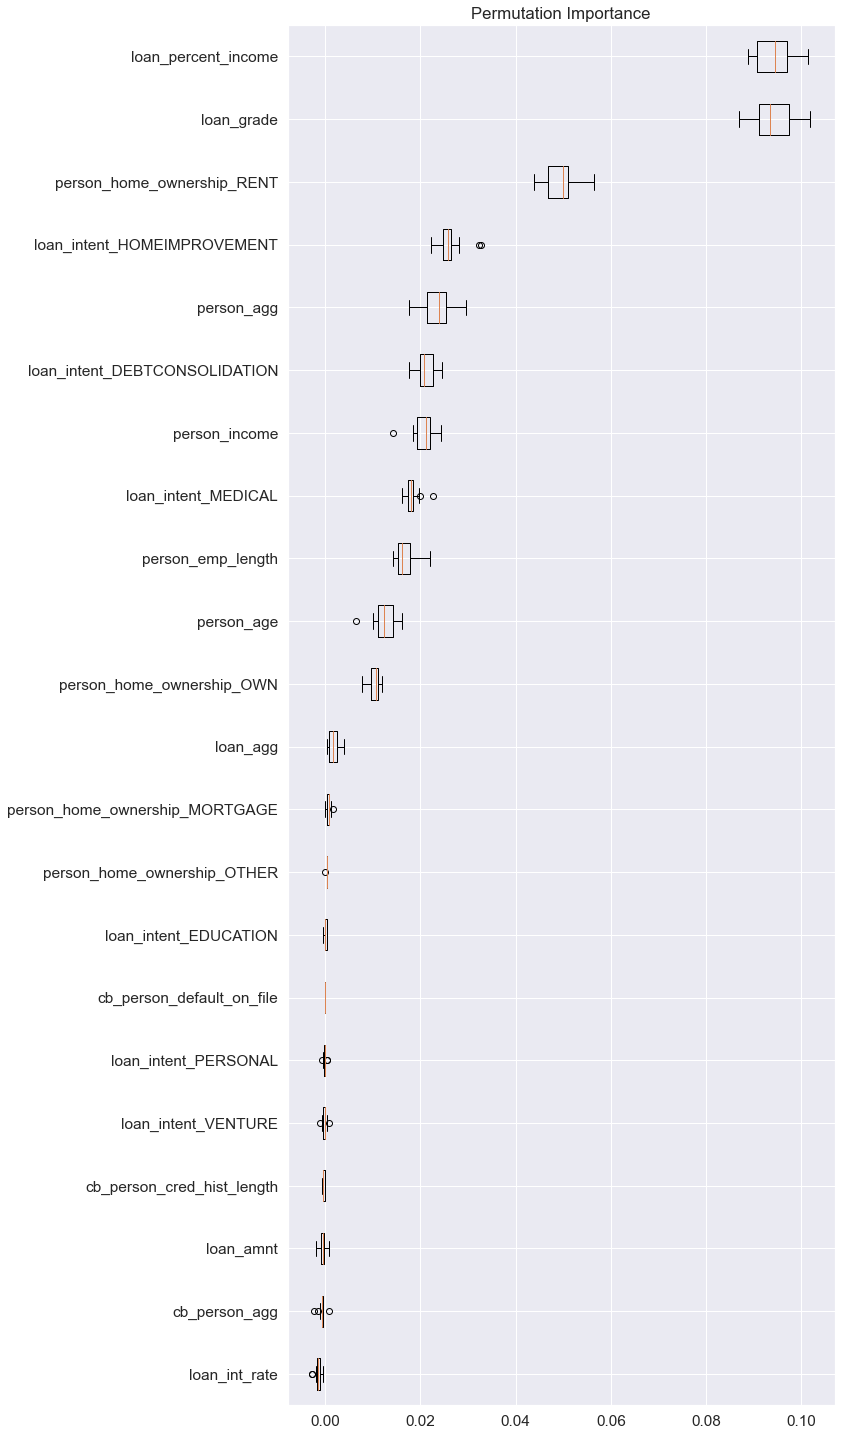

In [122]:
plot_perm_importances_last(model, X_test, Y_test)

## 6.3 SHAP Values

SHAP (SHapley Additive exPlanations) is a method to explain individual predictions.\
The goal of SHAP is to explain the prediction of an instance x by computing the contribution of each feature to the prediction.

In [123]:
shap.initjs()

In [124]:
def get_col_names(model):
    col = np.array(model["group_columns"].column_names_)

    for step in ['var_selector', 'kbest_selector', 'from_model_selector']:
        support_step = model[step].get_support()
        col = col[support_step]
    return col


def shap_calculate(model, example, example_class):
    shap_x_test = model.just_transform(model, example)
    col = get_col_names(model)
    shap_x_test = pd.DataFrame(shap_x_test, columns=col)

    explainer = shap.TreeExplainer(model['clf'])
    shap_values = explainer.shap_values(shap_x_test)

#     print('Pred class:', np.array([model['clf'].predict(shap_x_test.iloc[i,:].values.reshape(1, -1))[0] for i in range(example.shape[0])]))
#     print('True class:', example_class)
    
    return shap_values, shap_x_test, explainer


def summary_plot(shap_values, shap_x_test, bar=False):
    return shap.summary_plot(shap_values, shap_x_test, plot_type="bar", class_names=['malware', 'clean']) if bar else shap.summary_plot(shap_values[1], shap_x_test, class_names=['malware', 'clean'])
    
    
def force_plot(shap_values, shap_x_test, explainer):
    return shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], shap_x_test.iloc[0,:])


def make_shap_waterfall_plot(shap_values, features, num_display=20):
    column_list = features.columns
    feature_ratio = (np.abs(shap_values).sum(0) / np.abs(shap_values).sum()) * 100
    column_list = column_list[np.argsort(feature_ratio)[::-1]]
    feature_ratio_order = np.sort(feature_ratio)[::-1]
    cum_sum = np.cumsum(feature_ratio_order)
    column_list = column_list[:num_display]
    feature_ratio_order = feature_ratio_order[:num_display]
    cum_sum = cum_sum[:num_display]
    
    num_height = 0
    if (num_display >= 20) & (len(column_list) >= 20):
        num_height = (len(column_list) - 20) * 0.4
        
    fig, ax1 = plt.subplots(figsize=(8, 8 + num_height))
    ax1.plot(cum_sum[::-1], column_list[::-1], c='blue', marker='o', label="Cum.Sum Plot")
    ax2 = ax1.twiny()
    ax2.barh(column_list[::-1], feature_ratio_order[::-1], alpha=0.6, label="Individual Effect")
    
    ax1.grid(True)
    ax2.grid(False)
    ax1.set_xticks(np.arange(0, round(cum_sum.max(), -1)+1, 10))
    ax2.set_xticks(np.arange(0, round(feature_ratio_order.max(), -1)+1, 10))
    ax1.set_xlabel('Cumulative Ratio')
    ax2.set_xlabel('Composition Ratio')
    ax1.tick_params(axis="y", labelsize=13)
    plt.ylim(-1, len(column_list))

In [125]:
shap_values, shap_x_test, explainer = shap_calculate(model, X_test, Y_test)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


#### Summary Plot of Shap Values for Clean and Malware Samples

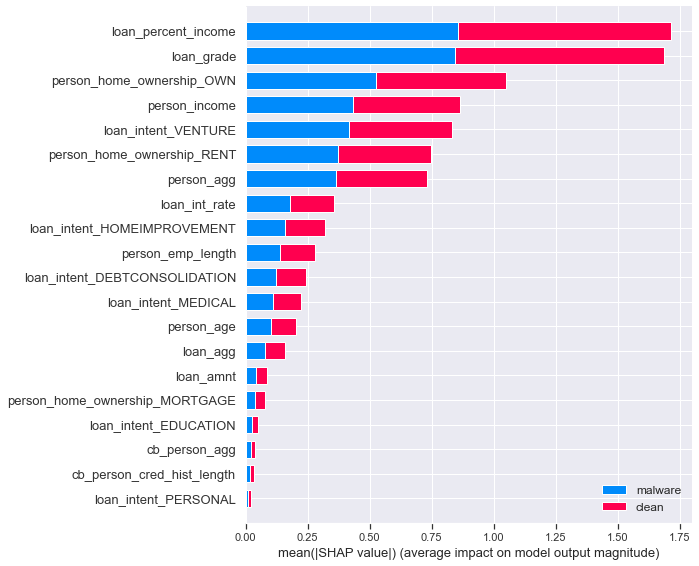

In [126]:
summary_plot(shap_values, shap_x_test, bar=True)

A variable importance plot lists the most significant variables in descending order. The top variables contribute more to the model than the bottom ones and thus have high predictive power.

#### Beeswarm summary plot

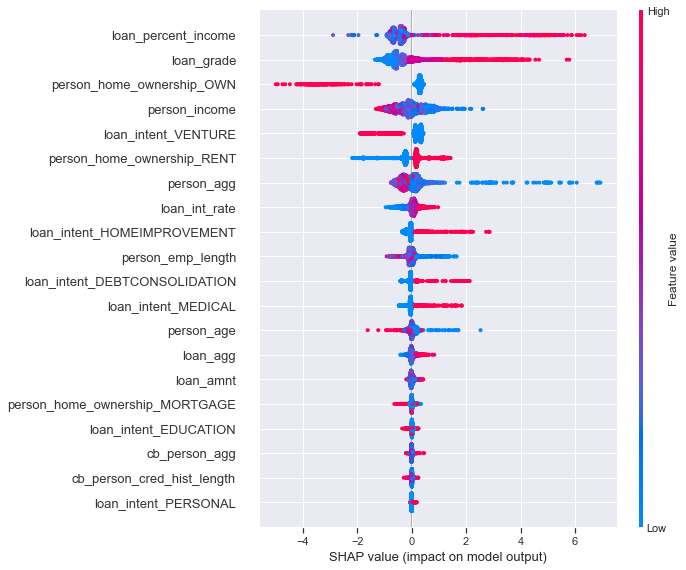

In [127]:
summary_plot(shap_values, shap_x_test)

The SHAP value plot can further show the positive and negative relationships of the predictors with the target variable

This plot is made of all the dots in the train data. It demonstrates the following information:

- ``Feature importance``: Variables are ranked in descending order.
- ``Impact:`` The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
- ``Original value:`` Color shows whether that variable is high probability to classify malicious (in red) or low probability to classify malicious (in blue) for that observation.

Based on the SHAP summary plot, we can see the top 20 features and their indications of the relationship between the value of a feature and the impact on the classification model. For better understanding let us have a look at the dependence plots.

#### Waterfall Plot

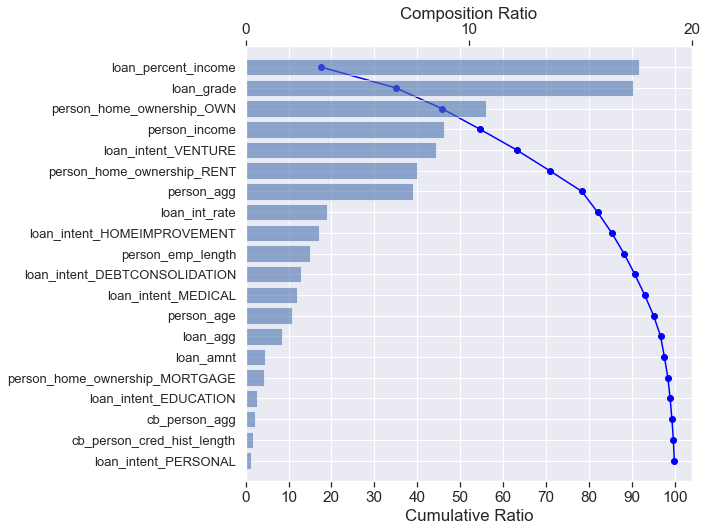

In [128]:
make_shap_waterfall_plot(shap_values[1], shap_x_test)

- Based on the SHAP waterfall plot, we can say that ``loan_percent_income`` and ``loan_grade`` is the most important feature in the model, which have around 35% of the model’s explainability.
- Top 10 features provide more than 90% of the model’s interpretation.
- So we can describe more than 90% of data with top 10 features.

### Dependence Plot
A dependence scatter plot shows the effect a single feature has on the predictions made by the model.

- Each dot is a single prediction (row) from the dataset.
- The x-axis is the value of the feature (from the X matrix, stored in shap_values.data).
- The y-axis is the SHAP value for that feature (stored in shap_values.values), which represents how much knowing that feature’s value changes the output of the model for that sample’s prediction.
- The light grey area at the bottom of the plot is a histogram showing the distribution of data values.

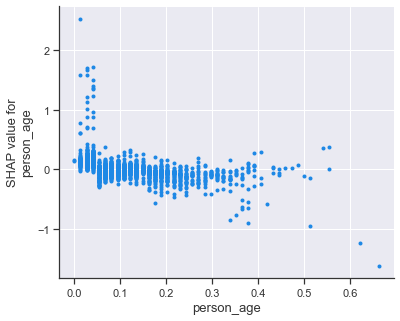

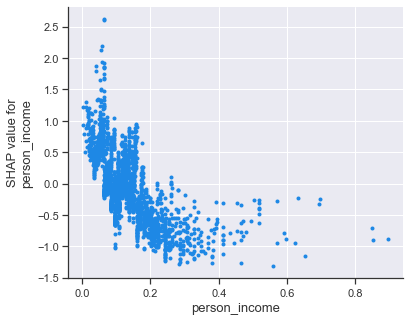

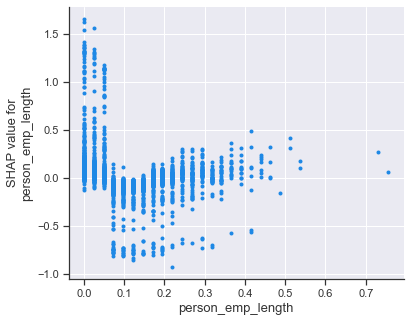

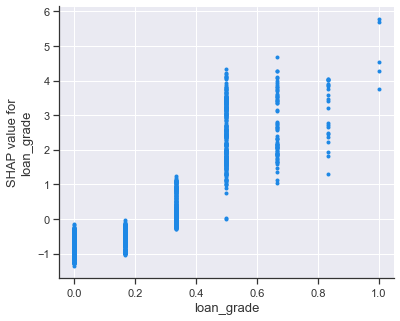

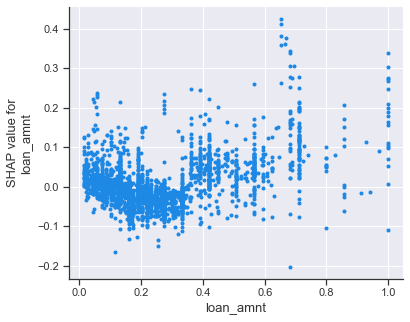

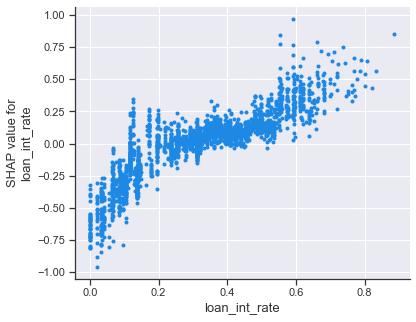

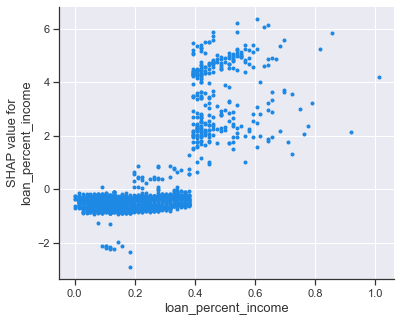

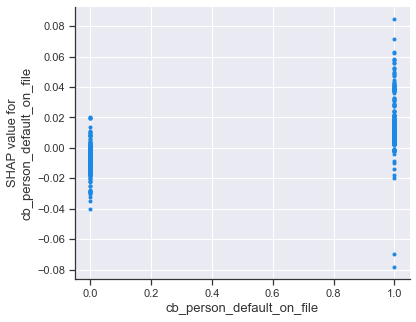

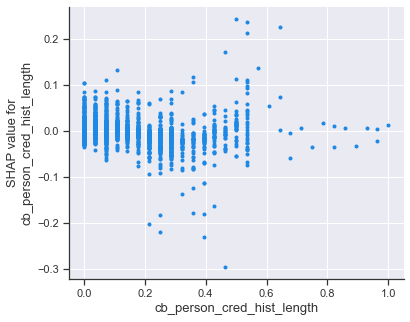

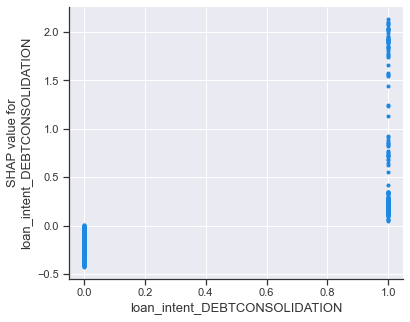

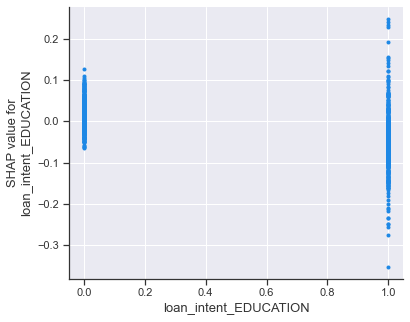

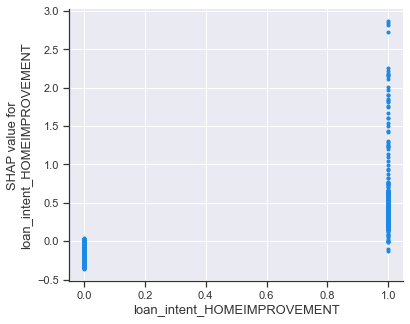

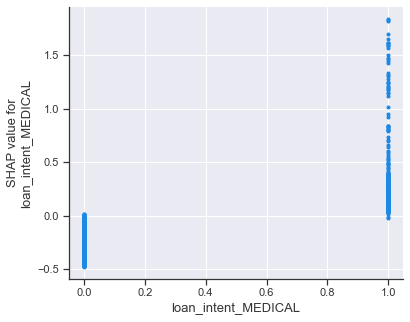

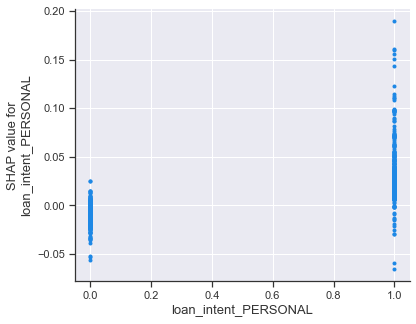

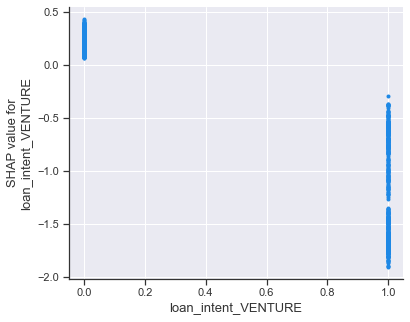

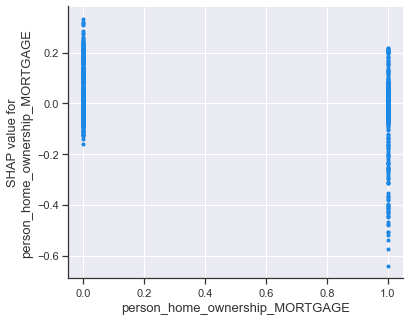

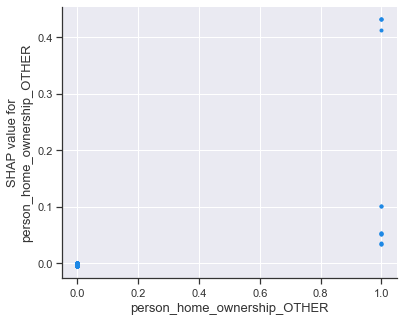

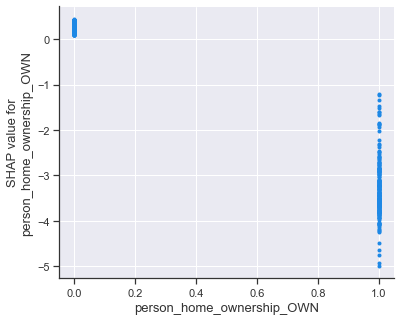

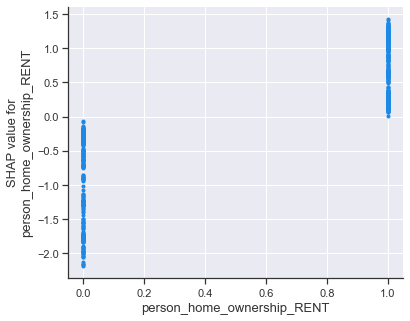

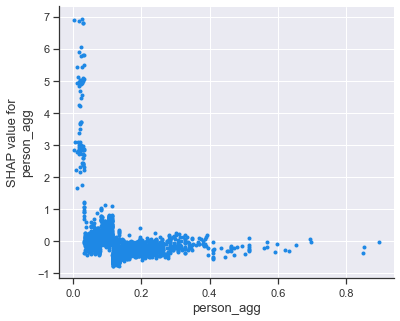

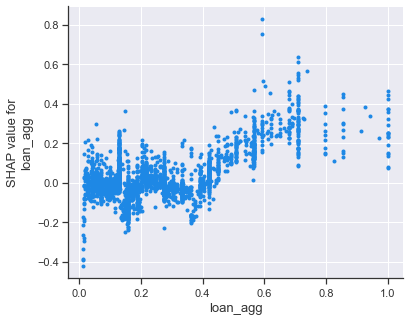

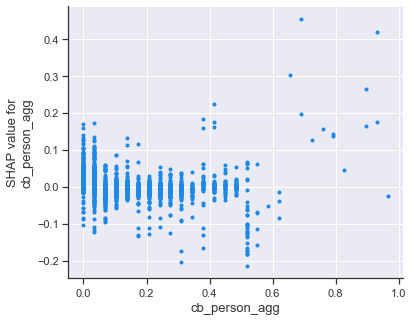

In [129]:
# top_features = ['loan_percent_income', 'loan_grade', 'person_home_ownership_OWN', 'person_income', 'loan_intent_VENTURE', 'person_agg']

# Visualizing top features
for feature in shap_x_test.columns:
    shap.dependence_plot(feature, shap_values[1], shap_x_test, interaction_index=None)

### Decision Plot

In [130]:
misclassified = pd.concat([X_test[(y_predict == 1) & (Y_test == 0)], X_test[(y_predict == 0) & (Y_test == 1)]])

In [131]:
misclassified.head()

person_age  person_income person_home_ownership  person_emp_length  \
19549          27          34560              MORTGAGE                8.0   
20122          29          38400              MORTGAGE                0.0   
2724           25          34000              MORTGAGE                1.0   
30028          41          38200                  RENT                4.0   
2567           23          33000              MORTGAGE                3.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  \
19549  HOMEIMPROVEMENT          E      10625          16.40   
20122          MEDICAL          C      14000          14.27   
2724   HOMEIMPROVEMENT          A       2500           6.03   
30028          MEDICAL          E       8875          19.03   
2567          PERSONAL          D       8325          15.99   

       loan_percent_income cb_person_default_on_file  \
19549                 0.31                         N   
20122                 0.36                         Y   
2724                  0.07                         N   
30028                 0.23                         N   
2567                  0.25                         N   

       cb_person_cred_hist_length  
19549                           7  
20122                           8  
2724                            2  
30028                          11  
2567                            3

In [132]:
X_sample = X.loc[misclassified.index,:]
Y_sample = y[misclassified.index]

In [133]:
shap_values_sample, shap_x_test_sample, explainer_sample = shap_calculate(model, X_sample, Y_sample)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


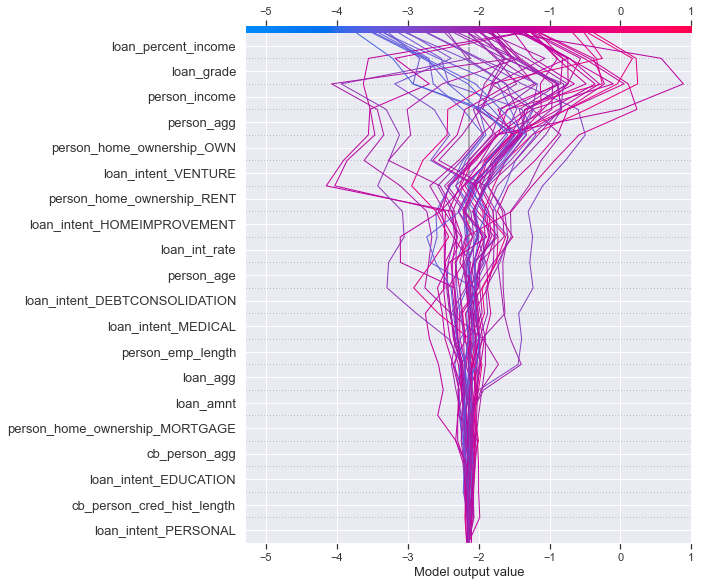

In [134]:
shap.decision_plot(explainer.expected_value[1], shap_values_sample[1][100:150,:], shap_x_test_sample.iloc[100:150,:])

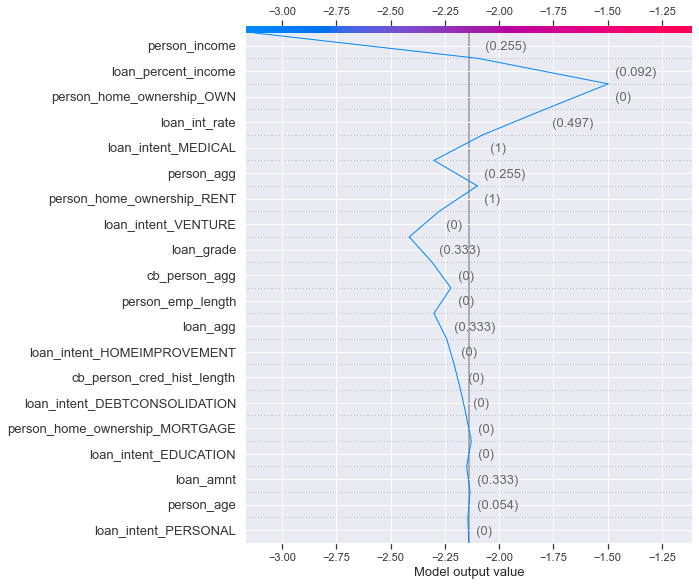

In [135]:
shap.decision_plot(explainer.expected_value[1], shap_values_sample[1][110,:], shap_x_test_sample.iloc[110,:])

# SUMMARY AND CONCLUSION

The model has been checked with validation set after training and to see how model behave into the production, it has been simulated by using test data. Both test and validation data results seems reasonable and robust.

If user wants to get better results for precision or recall, threshold of the classifier could be updated for their needs.

For now, default model has output like:

- accuracy: 0.9315910837817064
- precision: 0.9767981438515081
- recall: 0.7147707979626485
- f1 score: 0.8254901960784313

Unique values are..: [0 1]

Accurcy for test data..: 0.9315910837817064

ROC for test data..: 0.9476703633512896

Here is the Confusion Matrix...

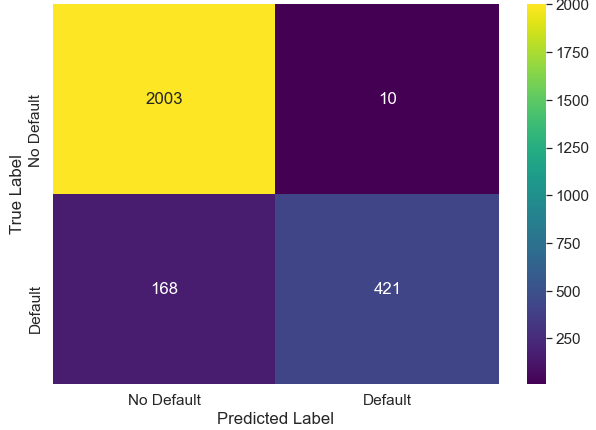

Here is the values count of test data...

{0: 2013, 1: 589}

> Here is the results after threshold optimizaiton:

- Results for threshold is ..: 0.23
- accuracy: 0.9158339738662568
- precision: 0.8388278388278388
- recall: 0.7775891341256367
- f1 score: 0.8070484581497797

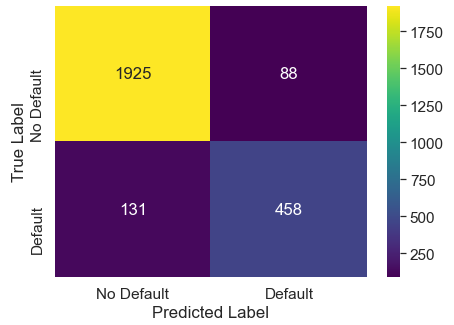

0: Negative Class ~ Clean | 1: Positive Class ~ Malware

{0: 2013, 1: 589}


### Feature Importance

From LGBM Importance

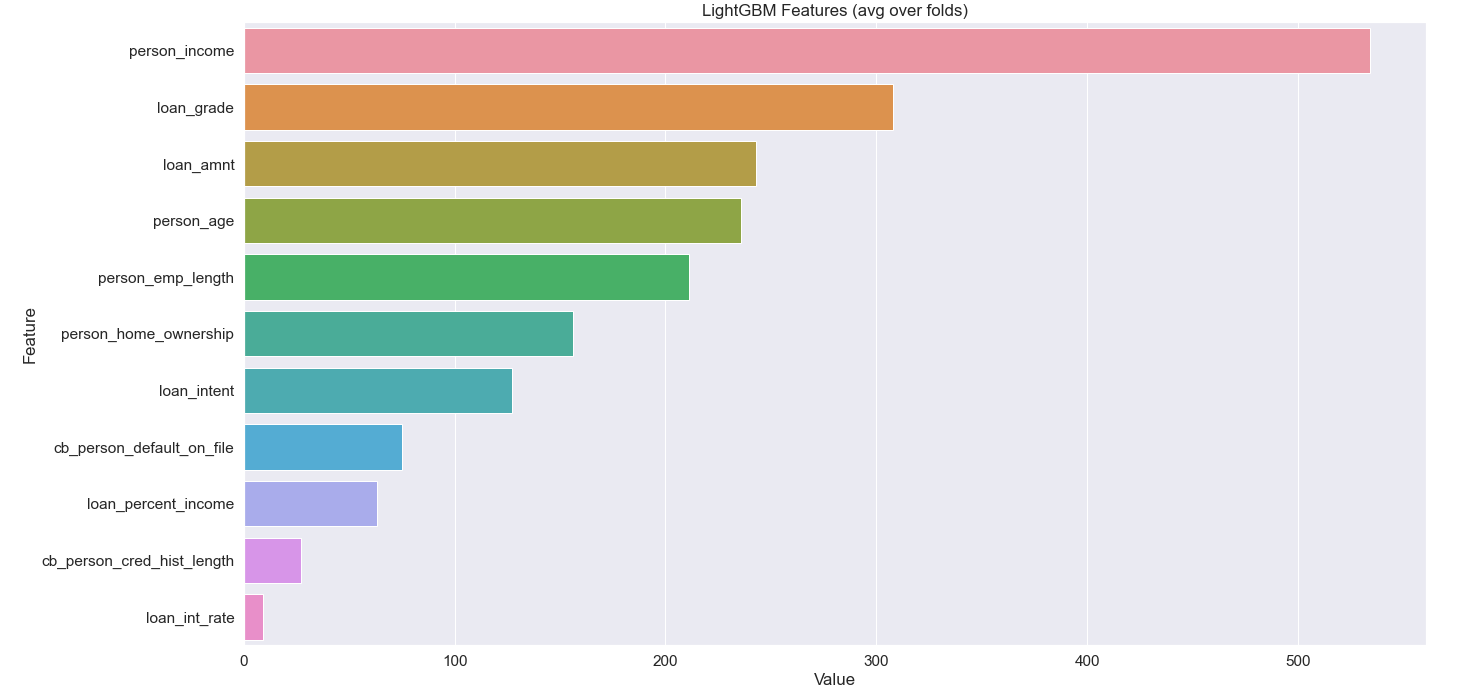

From Permutation Importance

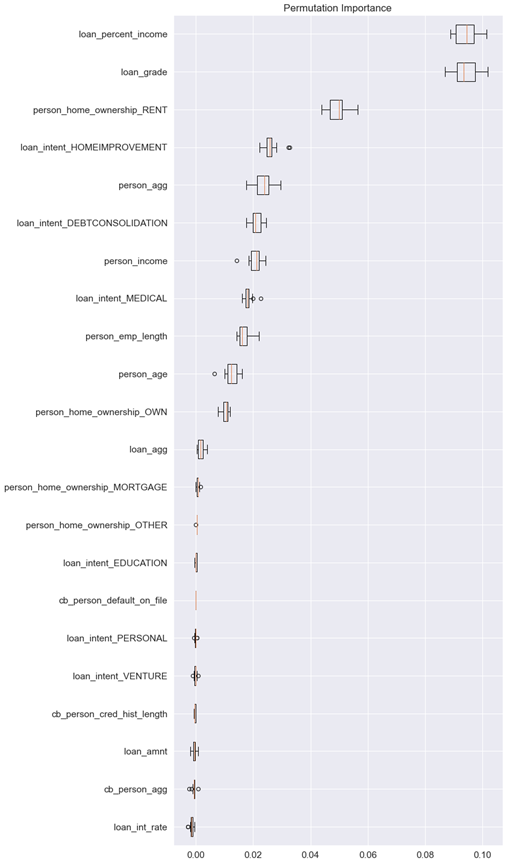

From the SHAP Values

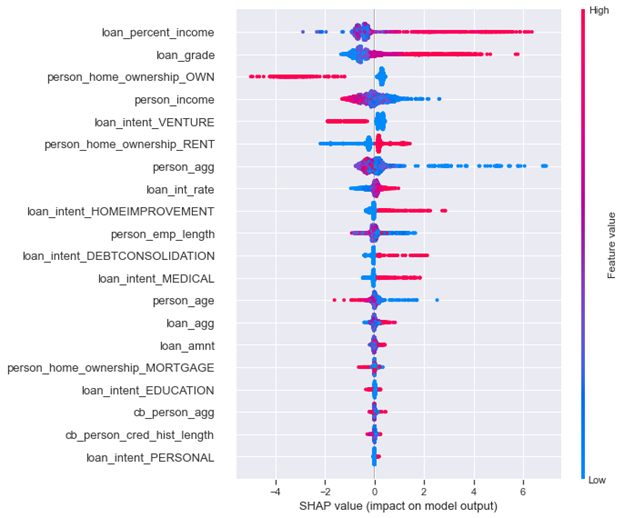

It can be observe that, top 5 most important feature for credit default detection is:

1. **loan_percent_income:** 
2. **loan_grade:**
3. **person_home_ownership_OWN:**
4. **person_income:**
5. **loan_intent_venture:**

Also, from the shap values, it can be concluded that,

- For high values of ``loan_percent_income`` and ``loan_grade``, model has tendency to predict as **Default**.
- For high values of ``person_home_ownership_OWN``, ``loan_intent_venture`` and ``person_income``, model has tendency to predict as **Not Default**.

These interpretation from the shap values are so informative to understand how model decide and how features effect this model decision.

For example, the decision plot that you can see below is from a misclassified sample,

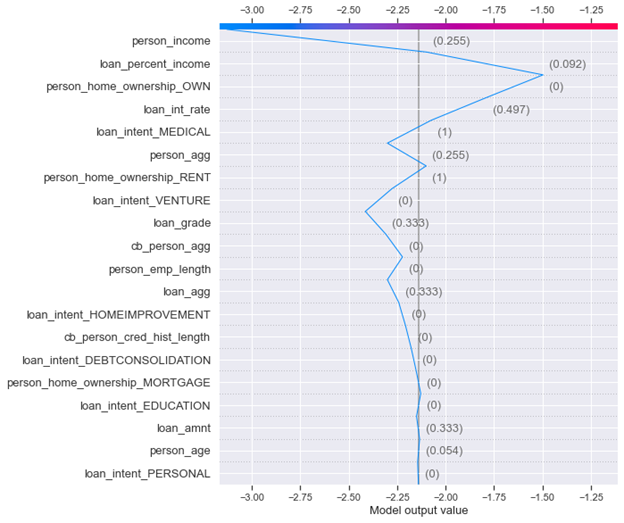

And it can be seen that first 2 most important feature have changed the model's decision from correct to a wrong one.

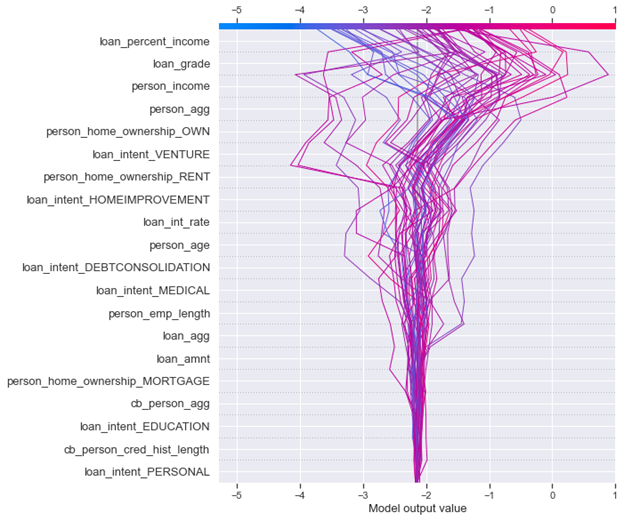

Here in the plot above, you can observe misclassified examples decision plot and see how our model got hard to predict correctly.

Further analysis on the results from these misclassified samples might be informative for further improvement. Maybe it can be detected that, there are missing features in the dataset.